In [170]:
import itertools as it
from math import log, log1p, log2, sqrt
from pathlib import Path
from typing import NamedTuple
import pandas as pd
from matplotlib import pyplot as plt
from collections import namedtuple
from source.utils import corners, optimize_am_df, print_iter, print_md_table, PKL_SUFF
from source.utils.associate import UCS_DIR

```python
from typing import NamedTuple

>>> from collections import namedtuple
>>> from datetime import date

>>> BasePerson = namedtuple(
...     "BasePerson",
...     "name birthdate country",
...     defaults=["Canada"]
... )

>>> class Person(BasePerson):
...     """A namedtuple subclass to hold a person's data."""
...     __slots__ = ()
...     def __repr__(self):
...         return f"Name: {self.name}, age: {self.age} years old."
...     @property
...     def age(self):
...         return (date.today() - self.birthdate).days // 365
...

>>> Person.__doc__
"A namedtuple subclass to hold a person's data."

>>> jane = Person("Jane", date(1996, 3, 5))
>>> jane.age
25
>>> jane
Name: Jane, age: 25 years old.
```

In [206]:
class LexUnit(NamedTuple):

    name: str = 'adv_form_lower'
    abbr: str = 'adv'
    position: int = 1

    # def __repr__(self):
    #     return (f'Lexical Unit in position {self.position} (`l{self.position}`): '
    #             f'column `{self.name}`, abbreviated as "{self.abbr}"')


LexUnit()

LexUnit(name='adv_form_lower', abbr='adv', position=1)

In [210]:
class Bigram(NamedTuple):
    
    adv: 'str'
    adj: 'str' = None
    
    if not self.adj: 
        try: 
            adv, adj = adv.split((' ', '_'))
        except TypeError: 
            pass
            # try: 
            #     adv, adj = adv.split('_')
    
    def __repr__(self):
        return f'{adv}_{adj}'
Bigram('thunderously enraged')

NameError: name 'adv' is not defined

In [216]:

    
class DataSpecs(NamedTuple):

    pattern_category: str = 'RBdirect'
    adX_margin_floor: int = 868
    ucs_show_floor: int = 20
    extra: bool = True
    polar: bool=False
    env_eval: bool = False
    lexical: tuple or LexUnit = None 
    

    if not lexical: 
        if env_eval: 
            lexical = LexUnit('bigram_lower', 'bigram', 2) 
            # other suggestions: 
                # LexUnit('adv_form_lower', 'adv', 2) 
                # LexUnit('adj_form_lower', 'adj', 2) 
        else:
            lexical = (
                LexUnit('adv_form_lower', 'adv', 1),
                LexUnit('adj_form_lower', 'adj', 2) 
            )
    else: 
        lexical = (lexical, )

DataSpecs()


DataSpecs(pattern_category='RBdirect', adX_margin_floor=868, ucs_show_floor=20, extra=True, polar=False, env_eval=False, lexical=(LexUnit(name='adv_form_lower', abbr='adv', position=1), LexUnit(name='adj_form_lower', abbr='adj', position=2)))

In [182]:
DataSpecs('NEGmirror')

DataSpecs(pattern_category='NEGmirror', adX_margin_floor=868)

In [217]:
class AssocTable(DataSpecs):
    __slots__ = () 

    @property
    def interaction(self):
        """The interaction property."""
        return 'polar' if self.polar else 'adv_adj'
    
    @property
    def pkl_path(self):
        
        file_glob = f'*{self.lexical_unit}35f*{self.adX_margin_floor}*min{self.ucs_show_floor}x*{PKL_SUFF}'
        polar_am_dir_path = UCS_DIR.joinpath(f'dataframes/polar/{self.pattern_category}/{LEX_UNIT}/extra')
        
        try:
            polar_am_pkl_path = list(polar_am_dir_path.glob(file_glob))[0]
        except IndexError: 
            exit('Assocation metrics for data specs could not be found.')
    
    def __repr__(self):
        return 
    # @interaction.setter
    # def interaction(self, value):
    #     self._interaction = value
        
    # def __repr__(self):


ato = AssocTable()
ato

AssocTable(pattern_category='RBdirect', adX_margin_floor=868, ucs_show_floor=20, extra=True, polar=False, env_eval=False, lexical=(LexUnit(name='adv_form_lower', abbr='adv', position=1), LexUnit(name='adj_form_lower', abbr='adj', position=2)))

In [203]:
ato.__slots__

()

In [ ]:
class FreqAxis(NamedTuple):

    abbr: str = 'adj'
    name: str = 'adj_form_lower'
    ix: int(0) or int(1) = 0


class FreqTable(DataSpecs):

    ax_0 = FreqAxis()
    ax_1 = FreqAxis('adv', 'adv_form_lower', 1)

In [ ]:
class Data(DataSpecs):
    
    @property
    def pkl_path(self):
        """The pkl_path property."""
        pkl_dir = 
        return 
    # @pkl_path.setter
    # def pkl_path(self, value):
    #     self._pkl_path = value 

In [166]:
%matplotlib inline

pd.set_option('display.max_colwidth', 40)
pd.set_option('display.max_columns', 16)
pd.set_option('display.width', 200)


In [ ]:

# data_specs = namedtuple(
    # 'DATA_SPECS', [
    # 'UCS_INCLUDE_FLOOR'
    # 'LEX_UNIT'
    # 'PAT_CAT'
    # 'AD__MARGIN_FLOOR'], 
    # defaults= [20, 
    #            'bigram',
    # 'RBdirect',
    # 868] )

In [75]:
full_amdf = pd.read_pickle(polar_am_pkl_path)
init_columns = full_amdf.columns.to_list()
# [
    # 'index',
    # 'l1', 'l2', 'f', 'E11',
    # 'r_log_likelihood', 'r_log_likelihood_tt', 'r_odds_ratio_disc', 'r_Dice', 'r_t_score',
    # 'r_p1_given2', 'r_p2_given1', 'r_p1_given2_simple', 'r_p2_given1_simple',
    # 'r_p1_given2_margin', 'r_p2_given1_margin', 'r_expect_diff',
    # 'am_log_likelihood', 'am_log_likelihood_tt', 'am_odds_ratio_disc', 'am_Dice', 'am_t_score',
    # 'am_p1_given2', 'am_p2_given1', 'am_p1_given2_simple', 'am_p2_given1_simple',
    # 'am_p1_given2_margin', 'am_p2_given1_margin', 'am_expect_diff',
    # 'f1', 'f2', 'N', 'O11', 'O12', 'O21', 'O22',
    # 'R1', 'R2', 'C1', 'C2', 'E12', 'E21', 'E22',
    # 'z_score', 't_score', 'log_likelihood', 'simple_ll', 'min_sensitivity',
    # 'liddell', 'dice', 'log_ratio', 'conservative_log_ratio',
    # 'mutual_information', 'local_mutual_information', 'ipm', 'ipm_reference', 'ipm_expected',
    # 'unexpected_count', 'unexpected_ratio', 'joint_probability',
    # 'adv', 'adj', 'adv_total', 'adj_total']
corners(full_amdf)

columns                     level_0          l1                       l2    f        E11  ... joint_probability      adv              adj adv_total adj_total
key                                                                                                                                                          
NEG~exactly_shy                   0     NEGATED              exactly_shy  124   4.686978  ...          0.000038  exactly              shy     59474   50705.0
NEG~exactly_forthcoming           1     NEGATED      exactly_forthcoming  107   4.044408  ...          0.000033  exactly      forthcoming     59474   11222.0
NEG~exactly_impressive            2     NEGATED       exactly_impressive  100   3.779821  ...          0.000031  exactly       impressive     59474  195257.0
NEG~exactly_straightforward       3     NEGATED  exactly_straightforward   83   3.137251  ...          0.000025  exactly  straightforward     59474   59550.0
NEG~exactly_intuitive             4     NEGATED        exactly_intuitive   76   2.872664  ...          0.000023  exactly        intuitive     59474   23266.0
...                             ...         ...                      ...  ...        ...  ...               ...      ...              ...       ...       ...
COM~yet_ready                160402  COMPLEMENT                yet_ready  227  7541.7376  ...          0.002254      yet            ready     96993  238826.0
COM~exactly_new              160403  COMPLEMENT              exactly_new   40  1364.4021  ...          0.000408  exactly              new     59474  320056.0
COM~exactly_easy             160404  COMPLEMENT             exactly_easy   31   1058.422  ...          0.000317  exactly             easy     59474  768452.0
COM~even_sure                160405  COMPLEMENT                even_sure  351  14308.903  ...          0.004326     even             sure   1120205  844066.0
COM~yet_clear                160406  COMPLEMENT                yet_clear  140  10288.824  ...           0.00318      yet            clear     96993  489305.0

In [112]:
len(full_amdf)

160407

In [76]:
N = full_amdf.N.iat[0]
f1_name = f'total_{lex_unit}_tokens'
env_totals = full_amdf.copy().reset_index()[['l1', 'f1']].drop_duplicates()
env_totals = env_totals.rename(columns={'f1': f1_name, 'l1':'polarity'}).set_index('polarity')
env_totals.at['either', f1_name] = N
env_totals[f1_name] = env_totals[f1_name].astype('int')
env_totals['relative_%'] = (env_totals[f1_name].apply(
    lambda t: round((t / N * 100), 2))).astype('float')
print_md_table(env_totals)
env_totals


| polarity   |   total_bigram_tokens |   relative_% |
|:-----------|----------------------:|-------------:|
| NEGATED    |             3,147,999 |            4 |
| COMPLEMENT |            80,136,344 |           96 |
| either     |            83,284,343 |          100 |



total_bigram_tokens  relative_%
polarity                                   
NEGATED                 3147999        3.78
COMPLEMENT             80136344       96.22
either                 83284343      100.00

In [77]:
adX = (full_amdf.copy().reset_index(drop=True).drop_duplicates(
    'l2').set_index('l2').filter(regex=r'^.d|f2')).rename(columns={'f2':'bigram_total'})
adX.index.name = 'bigram'
print_md_table(adX.sample(15), title='15 random bigrams & their component margins')
adX

15 random bigrams & their component margins
| bigram                 |   bigram_total | adv           | adj         |   adv_total |   adj_total |
|:-----------------------|---------------:|:--------------|:------------|------------:|------------:|
| fairly_uneven          |             47 | fairly        | uneven      |     393,218 |       6,684 |
| definitely_concerned   |            251 | definitely    | concerned   |     105,862 |     253,680 |
| really_stark           |             82 | really        | stark       |   2,096,057 |       8,135 |
| unbelievably_short     |             77 | unbelievably  | short       |      24,995 |     226,740 |
| not_finicky            |             38 | not           | finicky     |   4,415,785 |       2,096 |
| spectacularly_colorful |             39 | spectacularly | colorful    |       9,534 |      24,132 |
| much_superfluous       |             42 | much          | superfluous |   1,986,728 |       2,608 |
| totally_gratuitous     |            

bigram_total        adv              adj  adv_total  adj_total
bigram                                                                                 
exactly_shy                       124    exactly              shy      59474    50705.0
exactly_forthcoming               107    exactly      forthcoming      59474    11222.0
exactly_impressive                100    exactly       impressive      59474   195257.0
exactly_straightforward            83    exactly  straightforward      59474    59550.0
exactly_intuitive                  76    exactly        intuitive      59474    23266.0
...                               ...        ...              ...        ...        ...
legally_subject                    40    legally          subject      36949    52508.0
generally_unlawful                 39  generally         unlawful     130377     2960.0
just_muslim                        39       just           muslim     648023    22224.0
that_grim                          39       that             grim     249521    12206.0
remotely_necessary                 39   remotely        necessary      21408   186387.0

[148561 rows x 5 columns]

## Preparing the Association Table

In [78]:
keep_columns =  [
    #// 'index',
    'f', 
    'l1', 
    'l2', 
    'E11',
    'unexpected_count', 
    'unexpected_ratio', 
    #// 'r_log_likelihood', 'r_log_likelihood_tt', 'r_odds_ratio_disc', 'r_Dice', 'r_t_score',
    #// 'r_p1_given2', 'r_p2_given1', 'r_p1_given2_simple', 'r_p2_given1_simple',
    #// 'r_p1_given2_margin', 'r_p2_given1_margin', 'r_expect_diff',
    # 'am_log_likelihood', #//'am_log_likelihood_tt', 
    #// 'am_Dice', 'am_t_score',
    'am_p1_given2', 'am_p1_given2_simple', 'conservative_log_ratio', 'am_odds_ratio_disc', 
    # 'dice', 
    # 'joint_probability',
    #// 'am_p1_given2_margin', 'am_p2_given1_margin', 'am_expect_diff',
    # 'f1', 'N', #! These values can be found in `env_totals`
    'log_ratio', #> really only included to provide some insight about what is "conservative" about `conservative_log_ratio`
    'am_p2_given1', 
    'am_p2_given1_simple',
    #// 'O11', 'O12', 'O21', 'O22',
    #// 'R1', 'R2', 'C1', 'C2', 'E12', 'E21', 'E22',
    # 'z_score', 't_score', 
    # 'log_likelihood', 
    #// 'simple_ll', 'min_sensitivity', 'liddell', 
    #// 'mutual_information', 'local_mutual_information', 'ipm', 'ipm_reference', 'ipm_expected',
    # 'f2', 'adv', 'adj', 'adv_total', 'adj_total' #! These values are in `adX`
    ]


In [79]:
amdf = pd.read_pickle(polar_am_pkl_path)[keep_columns]

In [80]:
#! This is required to deal with some strangeness around `float32` dtype versus `float64` that was interfering with rounding
float32 = amdf.select_dtypes(include='float32').columns
amdf[float32] = amdf[float32].astype('float64')

amdf[['l1', 'l2']] = amdf[['l1', 'l2']].astype('string')
amdf.update(amdf.select_dtypes(include='float')
            # .apply(round, ndigits=3)
            .round(3)
            )

amdf.head()

f       l1                       l2    E11  unexpected_count  unexpected_ratio  am_p1_given2  am_p1_given2_simple  conservative_log_ratio  am_odds_ratio_disc  \
key                                                                                                                                                                                            
NEG~exactly_shy              124  NEGATED              exactly_shy  4.687           119.313             0.962         0.962                  1.0                   7.217               3.802   
NEG~exactly_forthcoming      107  NEGATED      exactly_forthcoming  4.044           102.956             0.962         0.962                  1.0                   6.986               3.738   
NEG~exactly_impressive       100  NEGATED       exactly_impressive  3.780            96.220             0.962         0.962                  1.0                   6.878               3.709   
NEG~exactly_straightforward   83  NEGATED  exactly_straightforward  3.137            79.863             0.962         0.962                  1.0                   6.580               3.629   
NEG~exactly_intuitive         76  NEGATED        exactly_intuitive  2.873            73.127             0.962         0.962                  1.0                   6.436               3.590   

                             log_ratio  am_p2_given1  am_p2_given1_simple  
key                                                                        
NEG~exactly_shy                 21.590           0.0                  0.0  
NEG~exactly_forthcoming         21.377           0.0                  0.0  
NEG~exactly_impressive          21.280           0.0                  0.0  
NEG~exactly_straightforward     21.011           0.0                  0.0  
NEG~exactly_intuitive           20.884           0.0                  0.0

### A curious thing with `print_md_table` and dtypes resulting from selection methods

In [81]:
print_md_table(amdf.select_dtypes(include='number').iloc[:6, :8], n_dec=3)


| key                         |       f |   E11 |   unexpected_count |   unexpected_ratio |   am_p1_given2 |   am_p1_given2_simple |   conservative_log_ratio |   am_odds_ratio_disc |
|:----------------------------|--------:|------:|-------------------:|-------------------:|---------------:|----------------------:|-------------------------:|---------------------:|
| NEG~exactly_shy             | 124.000 | 4.687 |            119.313 |              0.962 |          0.962 |                 1.000 |                    7.217 |                3.802 |
| NEG~exactly_forthcoming     | 107.000 | 4.044 |            102.956 |              0.962 |          0.962 |                 1.000 |                    6.986 |                3.738 |
| NEG~exactly_impressive      | 100.000 | 3.780 |             96.220 |              0.962 |          0.962 |                 1.000 |                    6.878 |                3.709 |
| NEG~exactly_straightforward |  83.000 | 3.137 |             79.863 |              0

In [82]:
num_cols=amdf.select_dtypes(include='number').columns.to_list()
print_md_table(amdf.head(6)[num_cols], n_dec=3)


| key                         |       f |   E11 |   unexpected_count |   unexpected_ratio |   am_p1_given2 |   am_p1_given2_simple |   conservative_log_ratio |   am_odds_ratio_disc |   log_ratio |   am_p2_given1 |   am_p2_given1_simple |
|:----------------------------|--------:|------:|-------------------:|-------------------:|---------------:|----------------------:|-------------------------:|---------------------:|------------:|---------------:|----------------------:|
| NEG~exactly_shy             | 124.000 | 4.687 |            119.313 |              0.962 |          0.962 |                 1.000 |                    7.217 |                3.802 |      21.590 |          0.000 |                 0.000 |
| NEG~exactly_forthcoming     | 107.000 | 4.044 |            102.956 |              0.962 |          0.962 |                 1.000 |                    6.986 |                3.738 |      21.377 |          0.000 |                 0.000 |
| NEG~exactly_impressive      | 100.000 | 3.780 

In [83]:
print_md_table(amdf.head(6).loc[:, ['f', 'E11', 'unexpected_count', 'unexpected_ratio']], n_dec=3)

| key                         |       f |   E11 |   unexpected_count |   unexpected_ratio |
|:----------------------------|--------:|------:|-------------------:|-------------------:|
| NEG~exactly_shy             | 124.000 | 4.687 |            119.313 |              0.962 |
| NEG~exactly_forthcoming     | 107.000 | 4.044 |            102.956 |              0.962 |
| NEG~exactly_impressive      | 100.000 | 3.780 |             96.220 |              0.962 |
| NEG~exactly_straightforward |  83.000 | 3.137 |             79.863 |              0.962 |
| NEG~exactly_intuitive       |  76.000 | 2.873 |             73.127 |              0.962 |
| NEG~exactly_novel           |  66.000 | 2.495 |             63.505 |              0.962 |



In [84]:
print_md_table(amdf.iloc[:6, :8], n_dec=3)


| key                         |   f | l1      | l2                      |   E11 |   unexpected_count |   unexpected_ratio |   am_p1_given2 |   am_p1_given2_simple |
|:----------------------------|----:|:--------|:------------------------|------:|-------------------:|-------------------:|---------------:|----------------------:|
| NEG~exactly_shy             | 124 | NEGATED | exactly_shy             | 4.687 |            119.313 |              0.962 |          0.962 |                 1.000 |
| NEG~exactly_forthcoming     | 107 | NEGATED | exactly_forthcoming     | 4.044 |            102.956 |              0.962 |          0.962 |                 1.000 |
| NEG~exactly_impressive      | 100 | NEGATED | exactly_impressive      | 3.780 |             96.220 |              0.962 |          0.962 |                 1.000 |
| NEG~exactly_straightforward |  83 | NEGATED | exactly_straightforward | 3.137 |             79.863 |              0.962 |          0.962 |                 1.000 |
| NEG~exac

## Plotting Association Measures

In [85]:
regex_p_given_ONLY = r'p[12]\w+[12]$'
regex_l12_OR_p_given = r'^[^r]*[lp][12]($|\w+[\de]$)'
regex_l12_OR_p1_given2 = r'l\d|p1_given2'
regex_l12_OR_conserv = r'(l\d|conserv)'

bigrams are a greater predictor of polarity than polarity is of specific bigrams. 
This makes sense given the huge variability within the bigram set.


<Axes: title={'center': 'sorted by p1_given2'}>

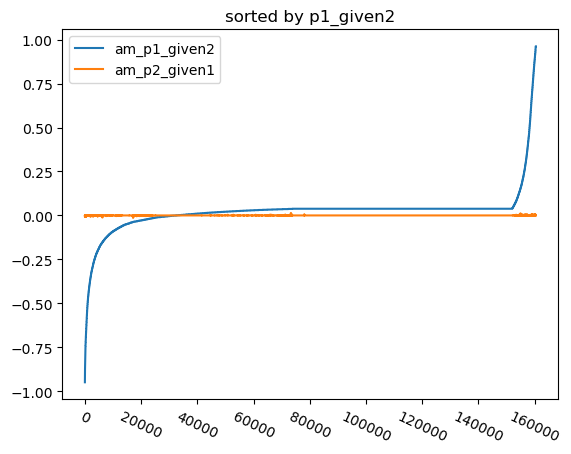

In [86]:
p_given = amdf.copy().filter(regex=regex_p_given_ONLY)
p_given.copy().sort_values('am_p1_given2').reset_index().plot(
    rot=-25, title='sorted by p1_given2')

array([[<Axes: title={'center': 'am_p1_given2'}>,
        <Axes: title={'center': 'am_p2_given1_simple'}>]], dtype=object)

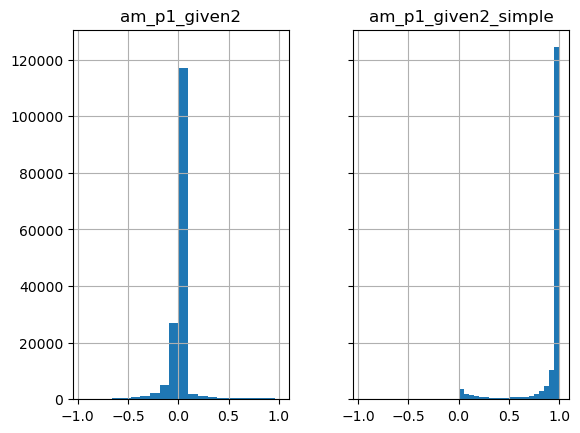

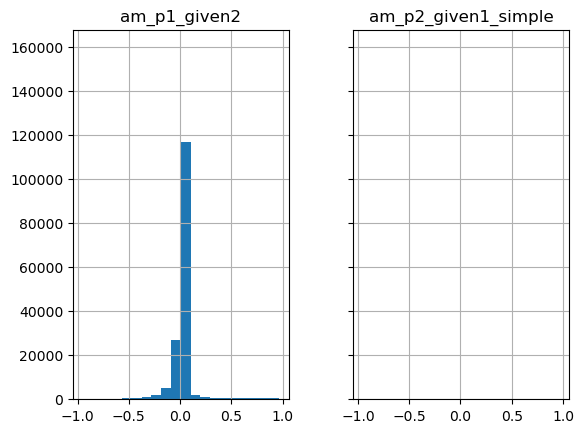

In [114]:
amdf.hist(['am_p1_given2', 
           'am_p1_given2_simple', 
           'am_p2_given1',
        #    'am_p2_given1_simple',
           ], sharey=True, sharex=True, bins=20)
amdf.hist([#'am_p1_given2', 
           'am_p1_given2_simple', 
        #    'am_p2_given1',
           'am_p2_given1_simple',
           ], sharey=True, sharex=True, bins=20)

This illustrates the effect of rounding.

<Axes: title={'center': 'Adjusted Conditional Probability Comparison\n**unrounded**'}, xlabel='bigram | polarity', ylabel='polarity | bigram'>

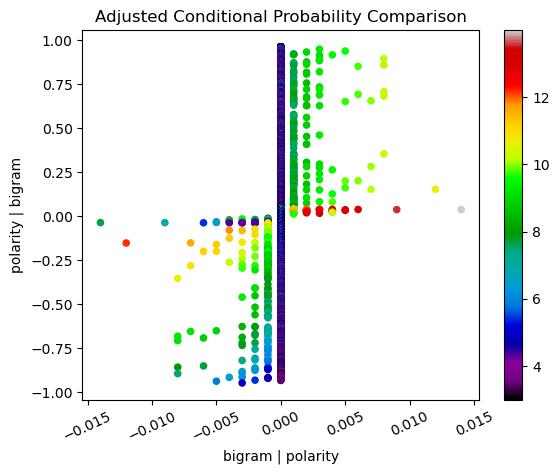

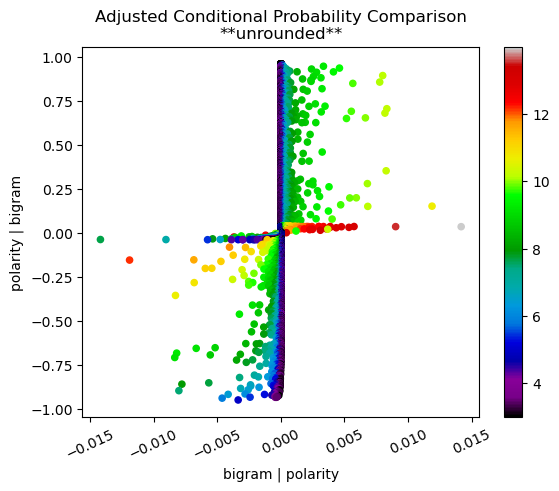

In [88]:
color = 'nipy_spectral'
amdf.plot(kind='scatter',  c=amdf.f.apply(log), cmap=color,
             y='am_p1_given2', ylabel='polarity | bigram', 
             x='am_p2_given1', xlabel='bigram | polarity',
             rot=25, title='Adjusted Conditional Probability Comparison')
full_amdf.plot(kind='scatter',  c=amdf.f.apply(log), cmap=color,
             y='am_p1_given2', ylabel='polarity | bigram', 
             x='am_p2_given1', xlabel='bigram | polarity',
             rot=25, title='Adjusted Conditional Probability Comparison\n**unrounded**')


(-1.0, 1.0, -1.0, 1.0)

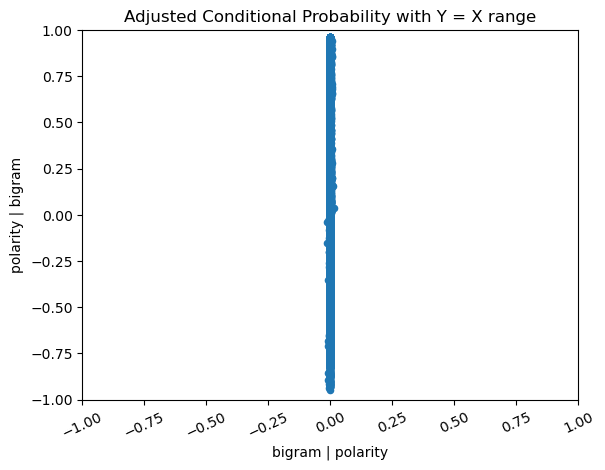

In [89]:
color = 'nipy_spectral'
amdf.plot(kind='scatter',
             y='am_p1_given2', ylabel='polarity | bigram', 
             x='am_p2_given1', xlabel='bigram | polarity',
             rot=25, title='Adjusted Conditional Probability with Y = X range')
plt.axis((-1, 1, -1, 1))


The following suggest that:

1. There is a linear relationship between `am_p1_given2` and `am_p1_given2_simple`
2. The polarity environment determines the intercept of this linear relationship

(_This is **not** an effect of rounding_)

<Axes: title={'center': 'Adjusted vs. Not (i.e. "simple")'}, xlabel='am_p1_given2', ylabel='am_p1_given2_simple'>

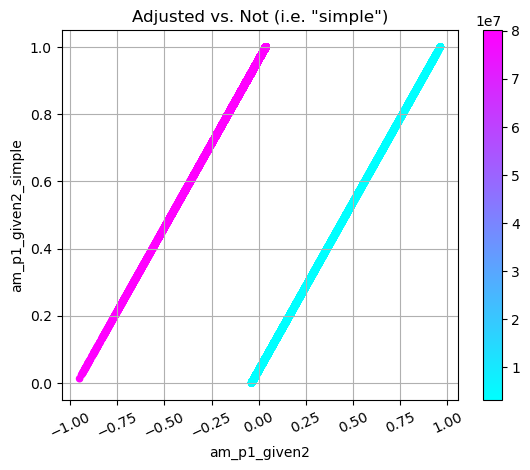

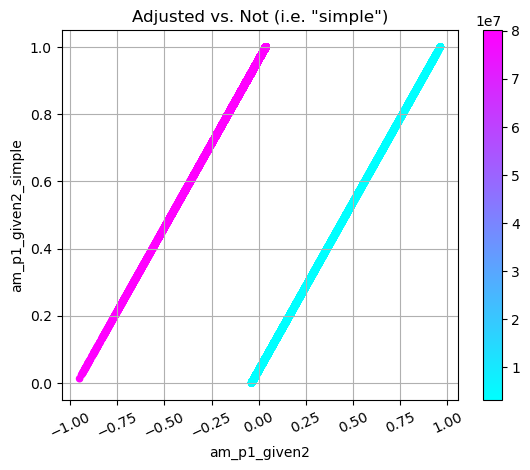

In [90]:

amdf.plot(kind='scatter', grid=True, c=full_amdf.f1, cmap='cool',
             x='am_p1_given2', y='am_p1_given2_simple', 
             rot=25, title='Adjusted vs. Not (i.e. "simple")')
amdf.plot(kind='scatter', grid=True, c=full_amdf.f1, cmap='cool',
             x='am_p1_given2', y='am_p1_given2_simple', 
             rot=25, title='Adjusted vs. Not (i.e. "simple")')


<Axes: title={'center': '**unrounded**'}, xlabel='am_p1_given2', ylabel='am_p1_given2_simple'>

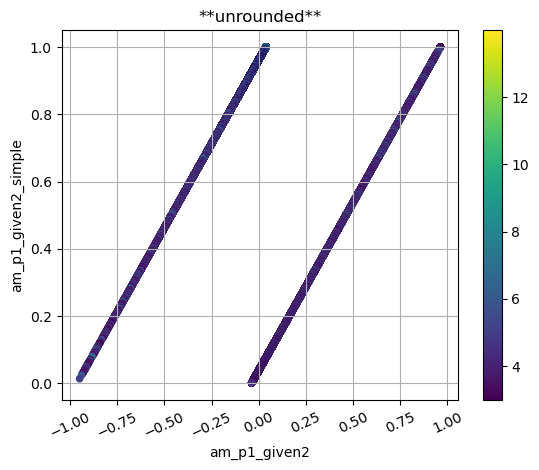

In [91]:
full_amdf.plot(kind='scatter', grid=True,  c=amdf.f.apply(log), cmap='viridis',
             x='am_p1_given2', y='am_p1_given2_simple', 
             rot=25, title='**unrounded**')

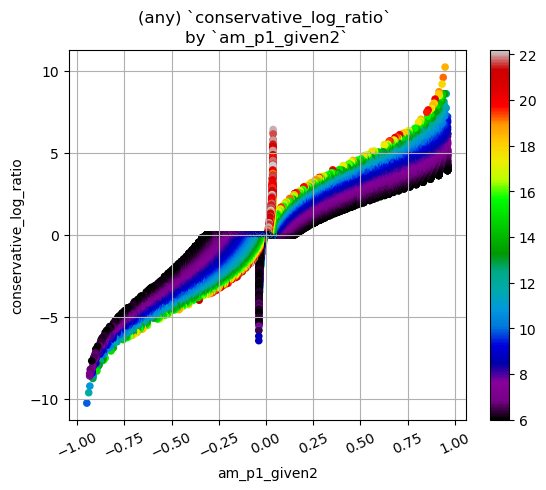

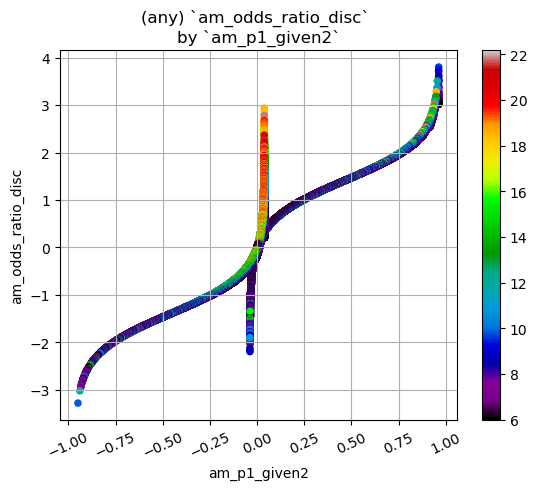

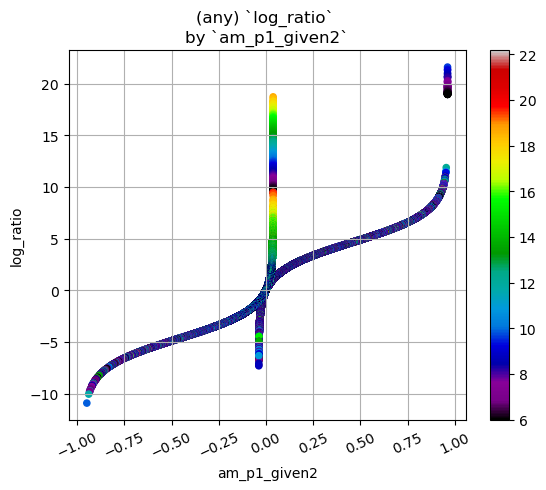

In [92]:

import numpy as np
from math import sqrt


def plot_y_by_xs(xs, y, df, polarity, color='turbo', color_scale='f'):
    for x in xs:
        df.plot(kind='scatter', grid=True,
                x=x, y=y,
                # c=df[y], 
                # # colormap='twilight_shifted', 
                # # colormap='RdBu_r', 
                # colormap='coolwarm', 
                #> this maps the marker to a color according to the **magnitude**, regardless of sign
                c=(df[color_scale]**2).apply(log) if color_scale else df[y].abs(),
                colormap=color, 
                rot=25,
                title=f'{polarity.capitalize()} `{y}` \nby `{x}`')


def illustrate_by_pol(polarity, df, 
                    #   color='BuPu'
                    #   color='Wistia',
                      # color='autumn_r',
                    #   color='PuBuGn', 
                    # color='hot',
                    #   color='turbo', 
                      color='winter', 
                      x_axes=None, 
                      y_axes=None, 
                      color_scale=None
                      ):
    import matplotlib as mpl
    x_df = (df.filter(items=x_axes).sort_values(x_axes[0]) if x_axes 
            else df.filter(like='p1_given2').sort_values('am_p1_given2'))
    x_axes = x_df.columns.to_list()
    # if len(x_axes) > 1 :
    #     x_df.plot(
    #         grid=True,
    #         # cmap='PiYG',
    #         # cmap='brg',
    #         # cmap='Set1',
    #         # cmap='bwr',
    #         cmap='winter',
    #         # cmap= mpl.colormaps['viridis'].resampled(2),
    #         rot=25, title=f'{polarity.capitalize()} \n {", ".join(x_axes)}')
    # else:
    #     x_df.hist(grid=True)

    for y in y_axes or ['conservative_log_ratio', 
                        'am_odds_ratio_disc', 'log_ratio']:
        plot_y_by_xs(x_axes, 
                     y, df, polarity, color, 
                     color_scale=color_scale or (
                       [c for c in ('f', 'bigram_total', 'f2', 'adv_total') if c in df.columns] 
                       + [None]
                       )[0])


# illustrate_by_pol('(any)', amdf.copy().reset_index())
illustrate_by_pol('(any)', amdf.copy().reset_index(), 
                  color='nipy_spectral', x_axes=['am_p1_given2'])

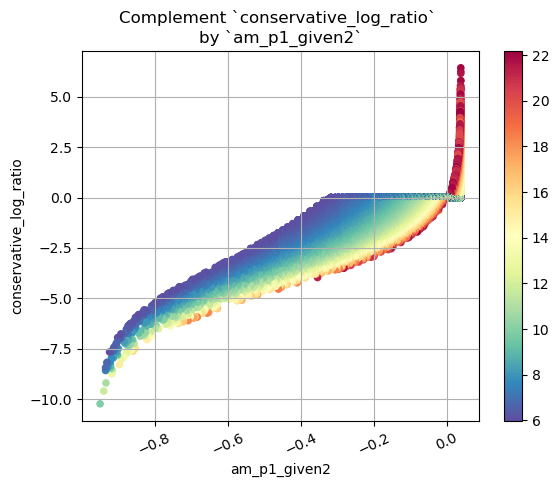

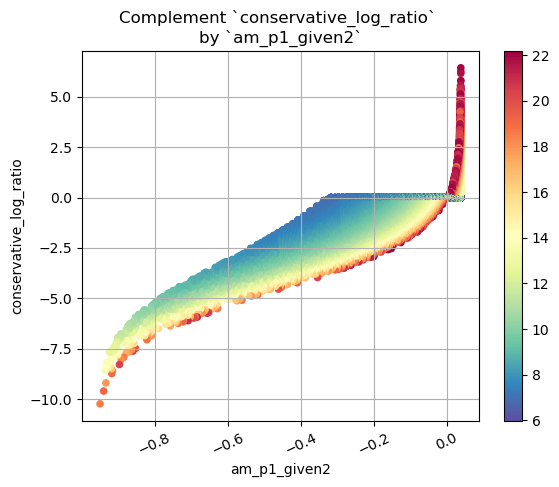

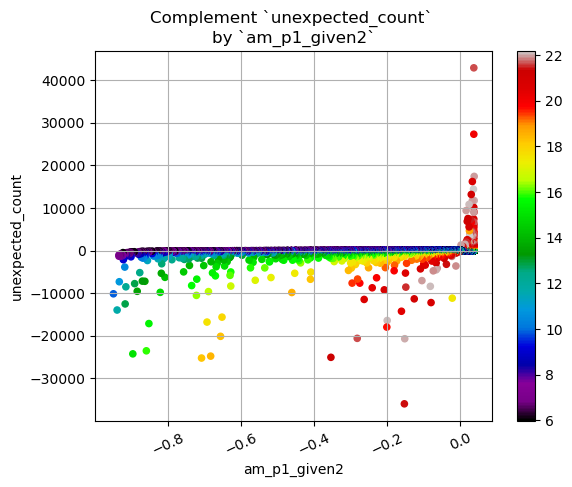

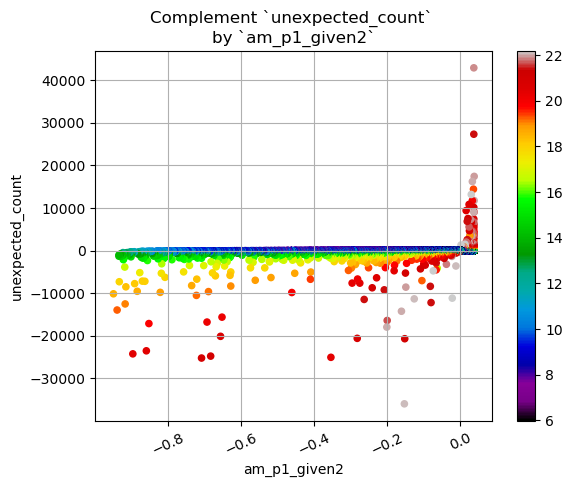

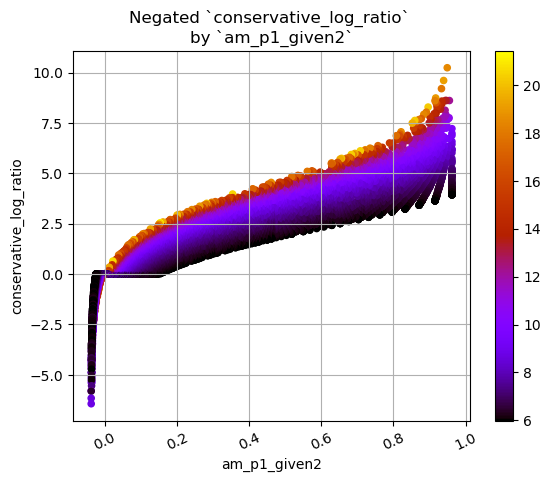

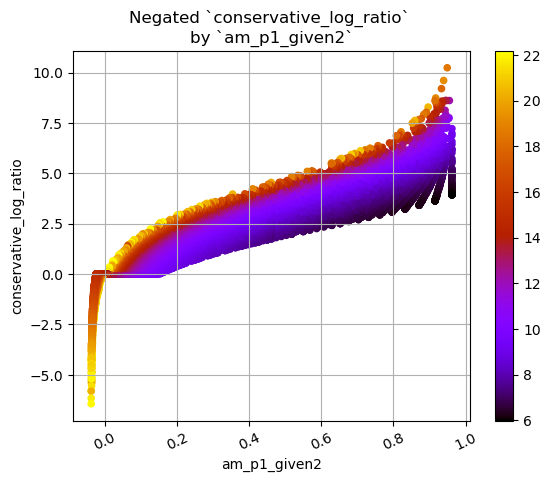

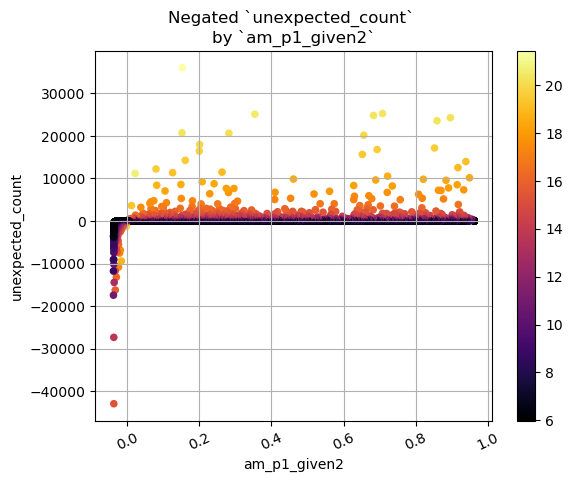

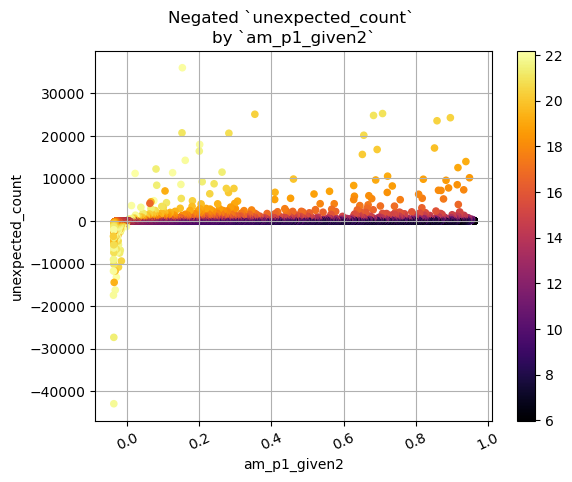

In [93]:
for p, df in amdf.groupby('l1'):
    illustrate_by_pol(p, df, color='gnuplot' if p.startswith('NEG') else 'Spectral_r', 
                      x_axes=['am_p1_given2'], y_axes=['conservative_log_ratio'], 
                      color_scale='f')
    illustrate_by_pol(p, df.assign(f2=df.index.to_series().apply(lambda i: full_amdf.f2[i])), 
                      color='gnuplot' if p.startswith('NEG') else 'Spectral_r', 
                      x_axes=['am_p1_given2'], y_axes=['conservative_log_ratio'], 
                      color_scale='f2')
    illustrate_by_pol(p, df, color='inferno' if p.startswith('NEG') else 'nipy_spectral', 
                      x_axes=['am_p1_given2'], y_axes=['unexpected_count'], 
                      color_scale='f')
    illustrate_by_pol(p, df.assign(f2=df.index.to_series().apply(lambda i: full_amdf.f2[i])), 
                      color='inferno' if p.startswith('NEG') else 'nipy_spectral', 
                      x_axes=['am_p1_given2'], y_axes=['unexpected_count'], 
                      color_scale='f2')

## Split table by polarity env (`l1`)

In [94]:
pols = list(amdf.l1.astype('string').unique())
pol_split = {p: pf.set_index('l2') for p, pf in amdf.copy().filter(
    regex=r'^.([^d]|$)').groupby('l1')}
corners(pol_split[pols[0]], 4)

columns                    f       l1        E11 unexpected_count  ... am_odds_ratio_disc log_ratio am_p2_given1 am_p2_given1_simple
l2                                                                                                                                  
exactly_shy              124  NEGATED      4.687          119.313  ...              3.802     21.59          0.0                 0.0
exactly_forthcoming      107  NEGATED      4.044          102.956  ...              3.738    21.377          0.0                 0.0
exactly_impressive       100  NEGATED       3.78            96.22  ...              3.709     21.28          0.0                 0.0
exactly_straightforward   83  NEGATED      3.137           79.863  ...              3.629    21.011          0.0                 0.0
...                      ...      ...        ...              ...  ...                ...       ...          ...                 ...
not_sure                 230  NEGATED  17659.815       -17429.815  ...             -1.903    -6.318       -0.006                 0.0
very_own                  25  NEGATED   3626.398        -3601.398  ...              -2.17    -7.236       -0.001                 0.0
very_little               71  NEGATED   9136.999        -9065.999  ...             -2.124    -7.063       -0.003                 0.0
most_recent               78  NEGATED  11837.832       -11759.832  ...             -2.197    -7.301       -0.004                 0.0

In [95]:
# sourcery skip: use-fstring-for-concatenation
for p, pf in pol_split.items():
    pf.drop('l1', axis=1, inplace=True)
    pf.columns = pf.columns + f'_{p[:3]}'
    pol_split[p] = pf
corners(pol_split[pols[0]], 3)

columns              f_NEG    E11_NEG unexpected_count_NEG  ... log_ratio_NEG am_p2_given1_NEG am_p2_given1_simple_NEG
l2                                                                                                                    
exactly_shy          124.0      4.687              119.313  ...         21.59              0.0                     0.0
exactly_forthcoming  107.0      4.044              102.956  ...        21.377              0.0                     0.0
exactly_impressive   100.0       3.78                96.22  ...         21.28              0.0                     0.0
...                    ...        ...                  ...  ...           ...              ...                     ...
very_own              25.0   3626.398            -3601.398  ...        -7.236           -0.001                     0.0
very_little           71.0   9136.999            -9065.999  ...        -7.063           -0.003                     0.0
most_recent           78.0  11837.832           -11759.832  ...        -7.301           -0.004                     0.0

In [96]:
corners(pol_split[pols[1]])

columns             f_COM    E11_COM unexpected_count_COM unexpected_ratio_COM am_p1_given2_COM  ... conservative_log_ratio_COM am_odds_ratio_disc_COM log_ratio_COM am_p2_given1_COM  \
l2                                                                                                                                                                                      
most_incredible   10921.0  10508.206              412.794                0.038            0.038  ...                      4.452                  2.934        18.711              0.0   
relatively_minor   9578.0   9215.969              362.031                0.038            0.038  ...                      4.262                  2.877        18.521              0.0   
pretty_little      8094.0   7788.061              305.939                0.038            0.038  ...                      4.019                  2.803        18.278              0.0   
no_fewer           8079.0   7773.628              305.372                0.038            0.038  ...                      4.016                  2.803        18.276              0.0   
now_defunct        7932.0   7632.185              299.815                0.038            0.038  ...                       3.99                  2.795        18.249              0.0   
...                   ...        ...                  ...                  ...              ...  ...                        ...                    ...           ...              ...   
yet_ready           227.0   7541.738            -7314.738              -32.224           -0.933  ...                     -9.202                 -2.931        -9.737           -0.002   
exactly_new          40.0   1364.402            -1324.402               -33.11           -0.934  ...                     -8.585                 -2.938        -9.776             -0.0   
exactly_easy         31.0   1058.422            -1027.422              -33.143           -0.934  ...                     -8.445                 -2.937        -9.778             -0.0   
even_sure           351.0  14308.903           -13957.903              -39.766           -0.939  ...                     -9.607                 -3.024        -10.04           -0.005   
yet_clear           140.0  10288.824           -10148.824              -72.492           -0.949  ...                     -10.24                 -3.283       -10.906           -0.003   

columns          am_p2_given1_simple_COM  
l2                                        
most_incredible                      0.0  
relatively_minor                     0.0  
pretty_little                        0.0  
no_fewer                             0.0  
now_defunct                          0.0  
...                                  ...  
yet_ready                            0.0  
exactly_new                          0.0  
exactly_easy                         0.0  
even_sure                            0.0  
yet_clear                            0.0

In [97]:
by_pol = (pd.DataFrame(index=amdf.l2.unique())
          .join(pol_split[pols[0]])
          .join(pol_split[pols[1]])
          .sort_index(axis=1))

In [98]:
adX_pol = by_pol.join(adX)

In [154]:
exactly = adX_pol.filter(like='exactly', axis=0)
exactly


E11_COM  E11_NEG  am_odds_ratio_disc_COM  am_odds_ratio_disc_NEG  am_p1_given2_COM  am_p1_given2_NEG  am_p1_given2_simple_COM  am_p1_given2_simple_NEG  ...  \
exactly_shy                  NaN    4.687                     NaN                   3.802               NaN             0.962                      NaN                      1.0  ...   
exactly_forthcoming          NaN    4.044                     NaN                   3.738               NaN             0.962                      NaN                      1.0  ...   
exactly_impressive           NaN    3.780                     NaN                   3.709               NaN             0.962                      NaN                      1.0  ...   
exactly_straightforward      NaN    3.137                     NaN                   3.629               NaN             0.962                      NaN                      1.0  ...   
exactly_intuitive            NaN    2.873                     NaN                   3.590               NaN             0.962                      NaN                      1.0  ...   
...                          ...      ...                     ...                     ...               ...               ...                      ...                      ...  ...   
exactly_vertical          24.055      NaN                  -0.727                     NaN            -0.122               NaN                    0.840                      NaN  ...   
exactly_perpendicular     50.034      NaN                  -0.799                     NaN            -0.155               NaN                    0.808                      NaN  ...   
exactly_different         40.412      NaN                  -0.968                     NaN            -0.224               NaN                    0.738                      NaN  ...   
exactly_square            48.110      NaN                  -1.198                     NaN            -0.342               NaN                    0.620                      NaN  ...   
exactly_symmetrical       38.488      NaN                  -1.321                     NaN            -0.412               NaN                    0.550                      NaN  ...   

                         unexpected_count_NEG  unexpected_ratio_COM  unexpected_ratio_NEG  bigram_total      adv              adj  adv_total  adj_total  
exactly_shy                           119.313                   NaN                 0.962           124  exactly              shy      59474    50705.0  
exactly_forthcoming                   102.956                   NaN                 0.962           107  exactly      forthcoming      59474    11222.0  
exactly_impressive                     96.220                   NaN                 0.962           100  exactly       impressive      59474   195257.0  
exactly_straightforward                79.863                   NaN                 0.962            83  exactly  straightforward      59474    59550.0  
exactly_intuitive                      73.127                   NaN                 0.962            76  exactly        intuitive      59474    23266.0  
...                                       ...                   ...                   ...           ...      ...              ...        ...        ...  
exactly_vertical                          NaN                -0.145                   NaN            25  exactly         vertical      59474     5203.0  
exactly_perpendicular                     NaN                -0.191                   NaN            52  exactly    perpendicular      59474     1424.0  
exactly_different                         NaN                -0.304                   NaN            42  exactly        different      59474   906600.0  
exactly_square                            NaN                -0.552                   NaN            50  exactly           square      59474     4245.0  
exactly_symmetrical                       NaN                -0.749                   NaN            40  exactly      symm

In [158]:
pretty = adX_pol.filter(like='fairprettyly', axis=0)

In [ ]:

def filter_row(df, filter_like:str=None, filter_regex:str=None, filter_items:)

In [162]:
def hist_by_pol(df, filter_like=None, filter_regex=None,
                metrics=['am_p1_given2', 'conservative_log_ratio', 'am_p1_given2_simple', 'log_ratio']):
    if filter_like: 
        df.filter_

SyntaxError: incomplete input (3931432885.py, line 2)

array([[<Axes: title={'center': 'am_p1_given2_NEG'}>,
        <Axes: title={'center': 'conservative_log_ratio_NEG'}>],
       [<Axes: title={'center': 'am_p1_given2_simple_NEG'}>,
        <Axes: title={'center': 'log_ratio_NEG'}>]], dtype=object)

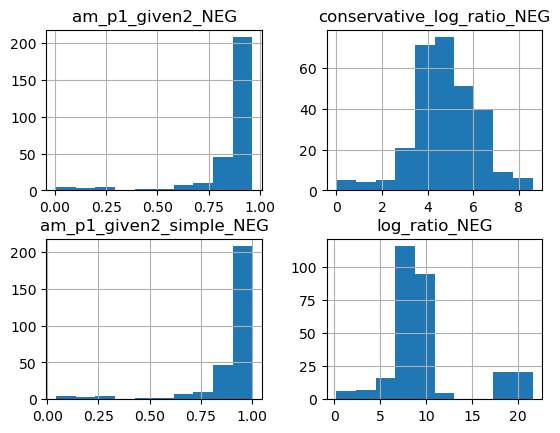

In [161]:
exactly.hist()


In [160]:
pretty.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1281 entries, fairly_significant to unfairly_disadvantaged
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   E11_COM                     1281 non-null   float64 
 1   E11_NEG                     3 non-null      float64 
 2   am_odds_ratio_disc_COM      1281 non-null   float64 
 3   am_odds_ratio_disc_NEG      3 non-null      float64 
 4   am_p1_given2_COM            1281 non-null   float64 
 5   am_p1_given2_NEG            3 non-null      float64 
 6   am_p1_given2_simple_COM     1281 non-null   float64 
 7   am_p1_given2_simple_NEG     3 non-null      float64 
 8   am_p2_given1_COM            1281 non-null   float64 
 9   am_p2_given1_NEG            3 non-null      float64 
 10  am_p2_given1_simple_COM     1281 non-null   float64 
 11  am_p2_given1_simple_NEG     3 non-null      float64 
 12  conservative_log_ratio_COM  1281 non-null   fl

array([[<Axes: title={'center': 'am_p1_given2_NEG'}>,
        <Axes: title={'center': 'conservative_log_ratio_NEG'}>],
       [<Axes: title={'center': 'am_p1_given2_simple_NEG'}>,
        <Axes: title={'center': 'log_ratio_NEG'}>]], dtype=object)

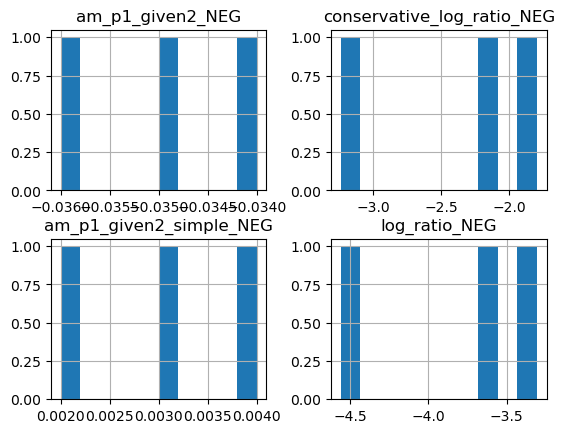

In [157]:
fairly.hist(['am_p1_given2_NEG', 'conservative_log_ratio_NEG', 'am_p1_given2_simple_NEG', 'log_ratio_NEG'])

In [150]:
adX_pol.sort_values('adv_total')

E11_COM  E11_NEG  am_odds_ratio_disc_COM  am_odds_ratio_disc_NEG  am_p1_given2_COM  am_p1_given2_NEG  am_p1_given2_simple_COM  am_p1_given2_simple_NEG  ...  \
pointedly_different       20.206      NaN                   0.228                     NaN             0.038               NaN                    1.000                      NaN  ...   
pointedly_political       55.808      NaN                  -0.206                     NaN            -0.014               NaN                    0.948                      NaN  ...   
pointedly_critical        27.904      NaN                   0.365                     NaN             0.038               NaN                    1.000                      NaN  ...   
pointedly_clear           20.206      NaN                   0.228                     NaN             0.038               NaN                    1.000                      NaN  ...   
cosmetically_sensitive    20.206      NaN                   0.228                     NaN             0.038               NaN                    1.000                      NaN  ...   
...                          ...      ...                     ...                     ...               ...               ...                      ...                      ...  ...   
very_european            644.675      NaN                   0.486                     NaN             0.026               NaN                    0.988                      NaN  ...   
very_informal           1305.708      NaN                   2.028                     NaN             0.038               NaN                    1.000                      NaN  ...   
very_relieved           1336.498      NaN                   2.038                     NaN             0.038               NaN                    1.000                      NaN  ...   
very_asymmetrical         55.808      NaN                   0.662                     NaN             0.038               NaN                    1.000                      NaN  ...   
very_vivid              2170.727      NaN                   0.754                     NaN             0.031               NaN                    0.993                      NaN  ...   

                        unexpected_count_NEG  unexpected_ratio_COM  unexpected_ratio_NEG  bigram_total           adv           adj  adv_total  adj_total  
pointedly_different                      NaN                 0.038                   NaN            21     pointedly     different        868   906600.0  
pointedly_political                      NaN                -0.015                   NaN            58     pointedly     political        868    43721.0  
pointedly_critical                       NaN                 0.038                   NaN            29     pointedly      critical        868   141953.0  
pointedly_clear                          NaN                 0.038                   NaN            21     pointedly         clear        868   489305.0  
cosmetically_sensitive                   NaN                 0.038                   NaN            21  cosmetically     sensitive        869   143415.0  
...                                      ...                   ...                   ...           ...           ...           ...        ...        ...  
very_european                            NaN                 0.026                   NaN           670          very      european    9913432     8252.0  
very_informal                            NaN                 0.038                   NaN          1357          very      informal    9913432     8264.0  
very_relieved                            NaN                 0.038                   NaN          1389          very      relieved    9913432     5340.0  
very_asymmetrical                        NaN                 0.038                   NaN            58          very  asymmetrical    9913432      962.0  
very_vivid                               NaN                 0.031                   NaN          2256         

array([[<Axes: title={'center': 'am_p1_given2_simple_COM'}>,
        <Axes: title={'center': 'am_p1_given2_simple_NEG'}>]],
      dtype=object)

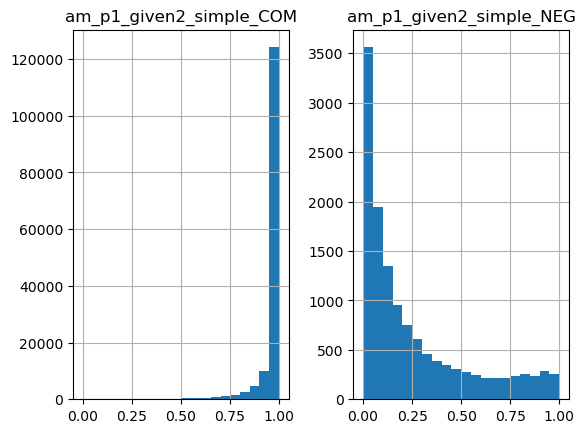

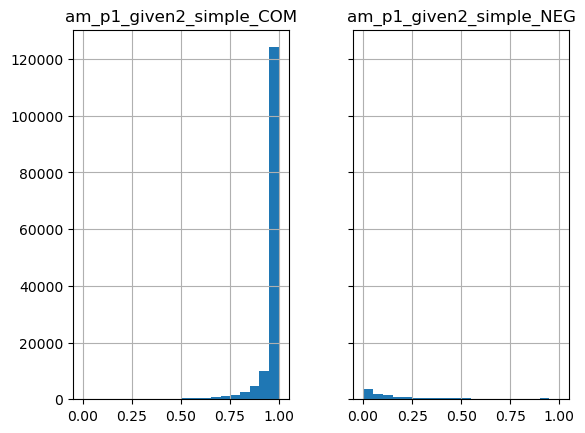

In [116]:
adX_pol.filter(regex='given2_simple_[CN]').hist(sharex=True, bins=20)
adX_pol.filter(regex='given2_simple_[CN]').hist(sharex=True,sharey=True, bins=20)


array([[<Axes: title={'center': 'am_p1_given2_COM'}>,
        <Axes: title={'center': 'am_p1_given2_NEG'}>]], dtype=object)

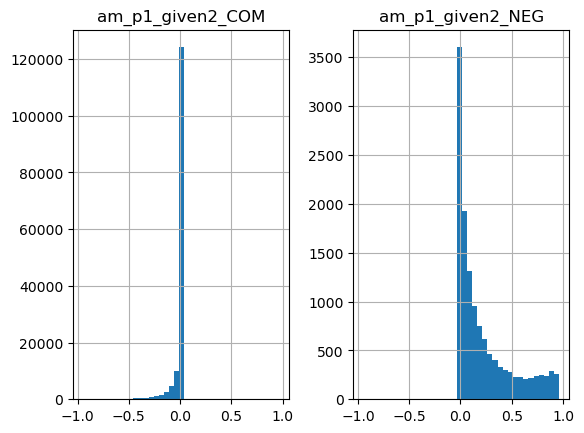

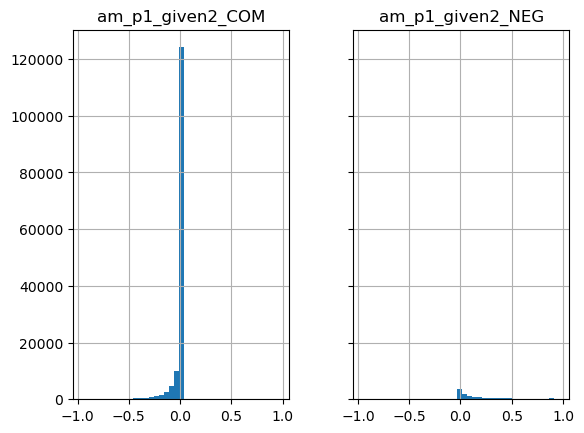

In [117]:
adX_pol.filter(regex='given2_[CN]').hist(sharex=True, bins=20)
adX_pol.filter(regex='given2_[CN]').hist(sharex=True,sharey=True, bins=20)


array([[<Axes: title={'center': 'am_p1_given2_simple_COM'}>,
        <Axes: title={'center': 'am_p1_given2_simple_NEG'}>]],
      dtype=object)

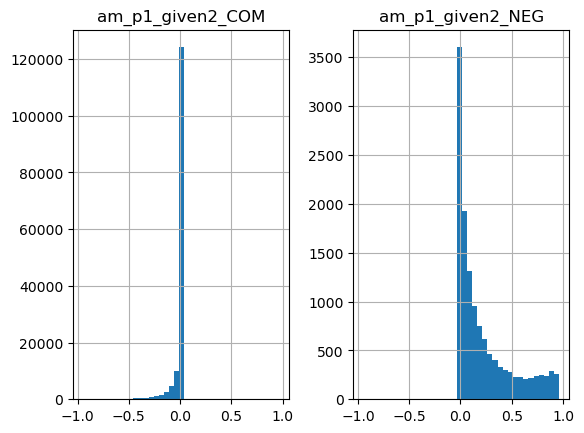

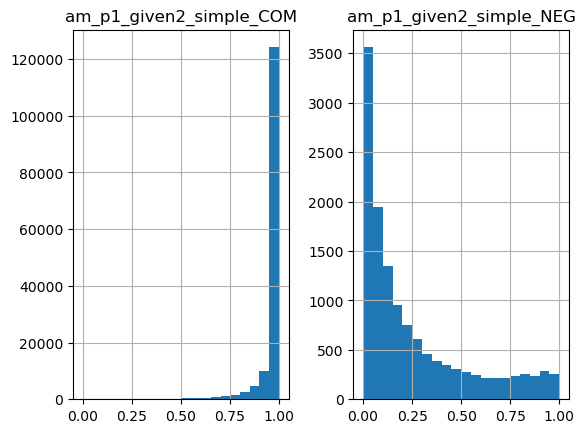

In [118]:
adX_pol.filter(regex='given2_[CN]').hist(sharex=True, bins=20)
adX_pol.filter(regex='given2_simple_[CN]').hist(sharex=True, bins=20)


array([[<Axes: title={'center': 'am_p1_given2_COM'}>,
        <Axes: title={'center': 'am_p1_given2_NEG'}>]], dtype=object)

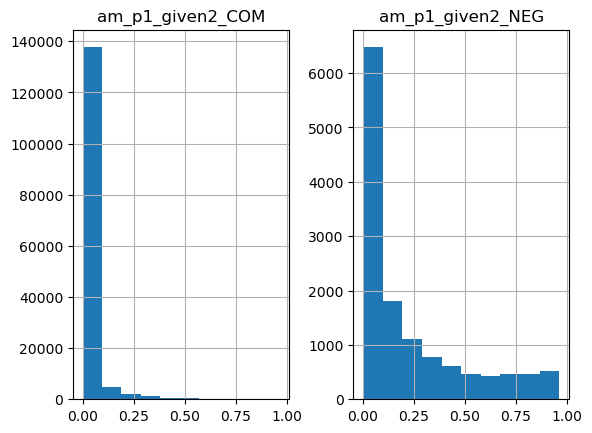

In [100]:
adX_pol.filter(regex='given2_[CN]').abs().hist(sharex=True)

array([[<Axes: title={'center': 'am_p1_given2_COM'}>,
        <Axes: title={'center': 'am_p1_given2_NEG'}>]], dtype=object)

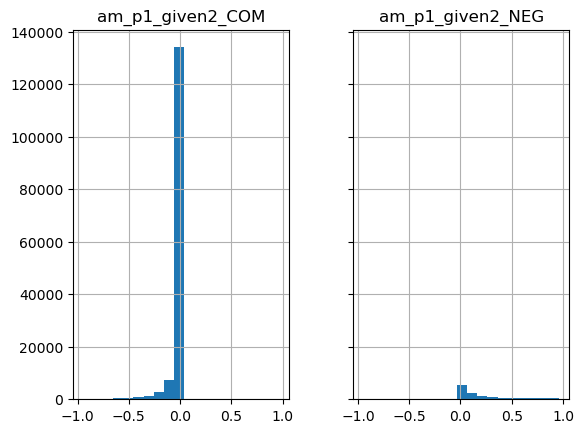

In [101]:
adX_pol.filter(regex='given2_[CN]').hist(sharey=True, sharex=True)

In [132]:
amdf.filter(like = 'COM~', axis=0).nlargest(20, columns=['am_p1_given2'])


f          l1                  l2        E11  unexpected_count  unexpected_ratio  am_p1_given2  am_p1_given2_simple  conservative_log_ratio  am_odds_ratio_disc  \
key                                                                                                                                                                                           
COM~most_incredible     10921  COMPLEMENT     most_incredible  10508.206           412.794             0.038         0.038                  1.0                   4.452               2.934   
COM~relatively_minor     9578  COMPLEMENT    relatively_minor   9215.969           362.031             0.038         0.038                  1.0                   4.262               2.877   
COM~pretty_little        8094  COMPLEMENT       pretty_little   7788.061           305.939             0.038         0.038                  1.0                   4.019               2.803   
COM~no_fewer             8079  COMPLEMENT            no_fewer   7773.628           305.372             0.038         0.038                  1.0                   4.016               2.803   
COM~now_defunct          7932  COMPLEMENT         now_defunct   7632.185           299.815             0.038         0.038                  1.0                   3.990               2.795   
COM~almost_daily         6972  COMPLEMENT        almost_daily   6708.471           263.529             0.038         0.038                  1.0                   3.804               2.739   
COM~relatively_modest    6614  COMPLEMENT   relatively_modest   6364.003           249.997             0.038         0.038                  1.0                   3.727               2.716   
COM~more_holistic        6449  COMPLEMENT       more_holistic   6205.239           243.761             0.038         0.038                  1.0                   3.691               2.705   
COM~pretty_significant   5719  COMPLEMENT  pretty_significant   5502.832           216.168             0.038         0.038                  1.0                   3.517               2.653   
COM~now_live             5426  COMPLEMENT            now_live   5220.907           205.093             0.038         0.038                  1.0                   3.441               2.630   
COM~very_slight          5324  COMPLEMENT         very_slight   5122.762           201.238             0.038         0.038                  1.0                   3.414               2.622   
COM~not_mistaken         5075  COMPLEMENT        not_mistaken   4883.174           191.826             0.038         0.038                  1.0                   3.345               2.601   
COM~seemingly_simple     4576  COMPLEMENT    seemingly_simple   4403.035           172.965             0.038         0.038                  1.0                   3.195               2.556   
COM~more_small           4475  COMPLEMENT          more_small   4305.853           169.147             0.038         0.038                  1.0                   3.163               2.546   
COM~largely_unchanged    4352  COMPLEMENT   largely_unchanged   4187.502           164.498             0.038         0.038                  1.0                   3.122               2.534   
COM~n't_surprised        4341  COMPLEMENT       n't_surprised   4176.918           164.082             0.038         0.038                  1.0                   3.119               2.533   
COM~also_evident         3868  COMPLEMENT        also_evident   3721.796           146.204             0.038         0.038                  1.0                   2.952               2.483   
COM~mostly_muslim        3847  COMPLEMENT       mostly_muslim   3701.590           145.410             0.038         0.038                  1.0                   2.944               2.480   
COM~relatively_mild      3769  COMPLEMENT     relatively_mild   3626.539           142.461             0.038         0.038                  1.0                   2.914               2.472   
COM~pretty_quick 

array([[<Axes: title={'center': 'conservative_log_ratio'}>,
        <Axes: title={'center': 'am_p1_given2'}>],
       [<Axes: title={'center': 'am_p1_given2_simple'}>, <Axes: >]],
      dtype=object)

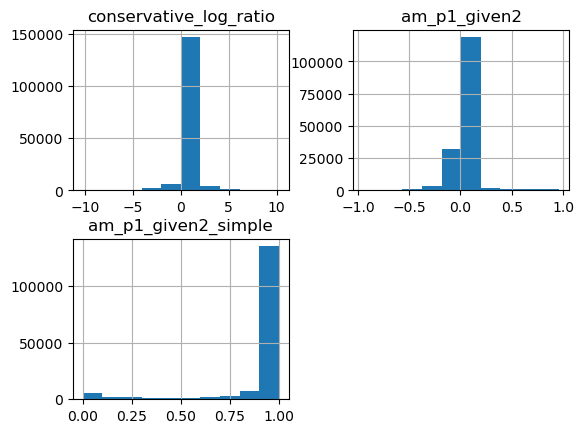

In [141]:
amdf.hist(['conservative_log_ratio', 'am_p1_given2', 'am_p1_given2_simple'])

In [148]:
adX_pol.filter(like='conserv').copy().fillna(-20).sort_values('conservative_log_ratio_NEG')

conservative_log_ratio_COM  conservative_log_ratio_NEG
around_worried                            0.000                     -20.000
somewhat_irrelevant                       0.000                     -20.000
slightly_quicker                          0.000                     -20.000
still_cheap                               0.000                     -20.000
more_tolerable                            1.040                     -20.000
...                                         ...                         ...
that_uncommon                           -20.000                       8.616
entirely_sure                            -8.739                       8.739
yet_ready                                -9.202                       9.202
even_sure                                -9.607                       9.607
yet_clear                               -10.240                      10.240

[148561 rows x 2 columns]

In [137]:
full_amdf.filter(like = 'COM~', axis=0).loc[~full_amdf.adv.isin(['not', "n't", 'never', 'hardly', 'no', 'none', 'rarely']), keep_columns].nlargest(20, columns=['conservative_log_ratio'])


f          l1                  l2         E11  unexpected_count  unexpected_ratio  am_p1_given2  am_p1_given2_simple  conservative_log_ratio  am_odds_ratio_disc  \
key                                                                                                                                                                                             
COM~most_recent         313107  COMPLEMENT         most_recent  301347.170         11759.830          0.037559      0.037691             0.999751                6.436486            2.196718   
COM~partly_cloudy        54410  COMPLEMENT       partly_cloudy   52356.286          2053.714          0.037745      0.037768             0.999945                6.259699            2.786114   
COM~very_little         241660  COMPLEMENT         very_little  232594.000          9066.000          0.037516      0.037614             0.999706                6.160747            2.124407   
COM~very_own             95916  COMPLEMENT            very_own   92314.602          3601.398          0.037547      0.037581             0.999739                5.807922            2.170075   
COM~far_more            103135  COMPLEMENT            far_more   99273.245          3861.755          0.037444      0.037476             0.999632                5.544369            2.022707   
COM~most_common         272621  COMPLEMENT         most_common  262476.140         10144.860          0.037212      0.037312             0.999391                5.401568            1.809808   
COM~very_first          149958  COMPLEMENT          very_first  144362.980          5595.020          0.037311      0.037359             0.999493                5.401441            1.887318   
COM~pretty_much          57867  COMPLEMENT         pretty_much   55696.088          2170.912          0.037516      0.037531             0.999706                5.385154            2.113913   
COM~relatively_small     55829  COMPLEMENT    relatively_small   53734.159          2094.841          0.037522      0.037537             0.999713                5.378603            2.123885   
COM~very_few            170173  COMPLEMENT            very_few  163832.170          6340.830          0.037261      0.037317             0.999442                5.346679            1.846004   
COM~far_less             32521  COMPLEMENT            far_less   31296.575          1224.425          0.037650      0.037659             0.999846                5.303165            2.366189   
COM~even_more           199405  COMPLEMENT           even_more  191985.240          7419.760          0.037209      0.037276             0.999389                5.300558            1.806871   
COM~also_available      114501  COMPLEMENT      also_available  110236.570          4264.430          0.037244      0.037273             0.999424                5.158017            1.830806   
COM~pretty_good         243512  COMPLEMENT         pretty_good  234480.880          9031.120          0.037087      0.037168             0.999261                5.144530            1.725546   
COM~slightly_different   54577  COMPLEMENT  slightly_different   52537.180          2039.820          0.037375      0.037383             0.999560                5.028168            1.942345   
COM~relatively_low       33195  COMPLEMENT      relatively_low   31948.948          1246.052          0.037537      0.037542             0.999729                5.015525            2.137739   
COM~very_next            18062  COMPLEMENT           very_next   17380.251           681.749          0.037745      0.037751             0.999945                4.961795            2.674989   
COM~very_least           84882  COMPLEMENT          very_least   81726.534          3155.466          0.037175      0.037189             0.999352                4.909574            1.779183   
COM~most_famous         165044  COMPLEMENT         most_famous  158937.450          6106.550          0.037000      0.037042             0.999171                4.897231

In [126]:
# amdf.filter(like = 'COM~exactly_', axis=0).nlargest(20, columns=['conservative_log_ratio'])
amdf.filter(like = 'COM~exactly_', axis=0).nsmallest(20, columns=['conservative_log_ratio'])


f          l1                   l2       E11  unexpected_count  unexpected_ratio  am_p1_given2  am_p1_given2_simple  conservative_log_ratio  am_odds_ratio_disc  log_ratio  \
key                                                                                                                                                                                                     
COM~exactly_sure         441  COMPLEMENT         exactly_sure  8949.439         -8508.439           -19.294        -0.915                0.047                  -8.604              -2.710     -8.998   
COM~exactly_new           40  COMPLEMENT          exactly_new  1364.402         -1324.402           -33.110        -0.934                0.028                  -8.585              -2.938     -9.776   
COM~exactly_easy          31  COMPLEMENT         exactly_easy  1058.422         -1027.422           -33.143        -0.934                0.028                  -8.445              -2.937     -9.778   
COM~exactly_clear         76  COMPLEMENT        exactly_clear  1765.640         -1689.640           -22.232        -0.921                0.041                  -8.302              -2.768     -9.203   
COM~exactly_happy         27  COMPLEMENT        exactly_happy   450.310          -423.310           -15.678        -0.905                0.058                  -7.248              -2.611     -8.700   
COM~exactly_ideal         27  COMPLEMENT        exactly_ideal   428.180          -401.180           -14.859        -0.902                0.061                  -7.167              -2.588     -8.622   
COM~exactly_great         20  COMPLEMENT        exactly_great   315.602          -295.602           -14.780        -0.901                0.061                  -6.955              -2.583     -8.615   
COM~exactly_true         285  COMPLEMENT         exactly_true  1674.231         -1389.231            -4.874        -0.798                0.164                  -6.497              -2.113     -7.022   
COM~exactly_fair          26  COMPLEMENT         exactly_fair   275.190          -249.190            -9.584        -0.871                0.091                  -6.471              -2.398     -7.992   
COM~exactly_accurate      64  COMPLEMENT     exactly_accurate   399.314          -335.314            -5.239        -0.808                0.154                  -6.062              -2.142     -7.125   
COM~exactly_comfortable   24  COMPLEMENT  exactly_comfortable   203.025          -179.025            -7.459        -0.848                0.114                  -6.021              -2.290     -7.632   
COM~exactly_good          44  COMPLEMENT         exactly_good   297.320          -253.320            -5.757        -0.820                0.142                  -6.006              -2.182     -7.260   
COM~exactly_normal        26  COMPLEMENT       exactly_normal   154.914          -128.914            -4.958        -0.801                0.161                  -5.418              -2.115     -7.046   
COM~exactly_perfect      184  COMPLEMENT      exactly_perfect   455.121          -271.121            -1.473        -0.573                0.389                  -4.536              -1.601     -5.321   
COM~exactly_consistent    20  COMPLEMENT   exactly_consistent    83.712           -63.712            -3.186        -0.732                0.230                  -4.432              -1.923     -6.414   
COM~exactly_comparable    36  COMPLEMENT   exactly_comparable   120.275           -84.275            -2.341        -0.674                0.288                  -4.385              -1.795     -5.976   
COM~exactly_appropriate   47  COMPLEMENT  exactly_appropriate   103.918           -56.918            -1.211        -0.527                0.435                  -3.391              -1.518     -5.046   
COM~exactly_correct      529  COMPLEMENT      exactly_correct   758.215          -229.215            -0.433        -0.291                0.671                  -2.981              -1.096     -3.640   
COM~exa

In [130]:
amdf.filter(like = 'pretty_', axis=0).nsmallest(20, columns=['am_p1_given2_simple'])


f          l1                  l2       E11  unexpected_count  unexpected_ratio  am_p1_given2  am_p1_given2_simple  conservative_log_ratio  am_odds_ratio_disc  log_ratio  \
key                                                                                                                                                                                                    
NEG~pretty_easy           43     NEGATED         pretty_easy  1201.530         -1158.530           -26.943        -0.036                0.001                  -3.728              -1.458     -4.858   
NEG~pretty_sure          116     NEGATED         pretty_sure  3188.884         -3072.884           -26.490        -0.036                0.001                  -4.113              -1.454     -4.834   
NEG~pretty_clear          36     NEGATED        pretty_clear  1130.242         -1094.242           -30.396        -0.037                0.001                  -3.805              -1.507     -5.026   
NEG~pretty_cool           53     NEGATED         pretty_cool  1868.592         -1815.592           -34.256        -0.037                0.001                  -4.164              -1.560     -5.194   
NEG~pretty_good          180     NEGATED         pretty_good  9211.121         -9031.121           -50.173        -0.037                0.001                  -5.145              -1.726     -5.732   
NEG~pretty_obvious        38     NEGATED      pretty_obvious   579.333          -541.333           -14.246        -0.035                0.002                  -2.788              -1.193     -3.982   
NEG~pretty_close          35     NEGATED        pretty_close   786.316          -751.316           -21.466        -0.036                0.002                  -3.306              -1.361     -4.543   
NEG~pretty_bad            34     NEGATED          pretty_bad   770.630          -736.630           -21.666        -0.036                0.002                  -3.303              -1.365     -4.556   
NEG~pretty_right          22     NEGATED        pretty_right     7.711            14.289             0.650         0.070                0.108                   0.000               0.497      1.622   
NEG~pretty_enough        544     NEGATED       pretty_enough    61.233           482.767             0.887         0.298                0.336                   3.235               1.110      3.686   
COM~pretty_enough       1076  COMPLEMENT       pretty_enough  1558.767          -482.767            -0.449        -0.298                0.664                  -3.235              -1.110     -3.686   
COM~pretty_everyday       24  COMPLEMENT     pretty_everyday    26.942            -2.942            -0.123        -0.105                0.857                   0.000              -0.670     -2.085   
COM~pretty_right         182  COMPLEMENT        pretty_right   196.289           -14.289            -0.079        -0.070                0.892                   0.000              -0.497     -1.622   
COM~pretty_cognizant      20  COMPLEMENT    pretty_cognizant    20.206            -0.206            -0.010        -0.010                0.952                   0.000              -0.270     -0.349   
COM~pretty_intolerable    22  COMPLEMENT  pretty_intolerable    22.131            -0.131            -0.006        -0.006                0.957                   0.000              -0.230     -0.212   
COM~pretty_prosperous     23  COMPLEMENT   pretty_prosperous    23.093            -0.093            -0.004        -0.004                0.958                   0.000              -0.211     -0.148   
COM~pretty_visual         71  COMPLEMENT       pretty_visual    71.203            -0.203            -0.003        -0.003                0.959                   0.000              -0.096     -0.106   
COM~pretty_sufficient     25  COMPLEMENT   pretty_sufficient    25.017            -0.017            -0.001        -0.001                0.962                   0.000              -0.175     -0.027   
COM~pretty_sanguine       5

In [ ]:
amdf.filter(like = 'COM~pretty_', axis=0).nlargest(20, columns=['conservative_log_ratio'])


In [ ]:
# from source.utils.sample import sample_pickle as spkl
# hits_path

In [ ]:
adX_pol.filter(like = 'exactly_', axis=0).nlargest(20, columns=['am_p1_given2_NEG'])

<Axes: >

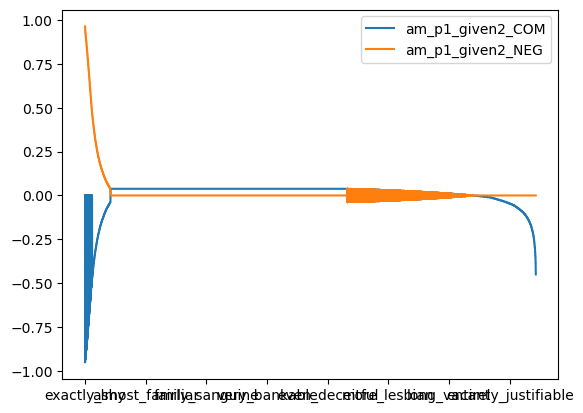

In [102]:
adX_pol.copy().filter(regex=r'given2_[NC]').fillna(0).plot()

<Axes: >

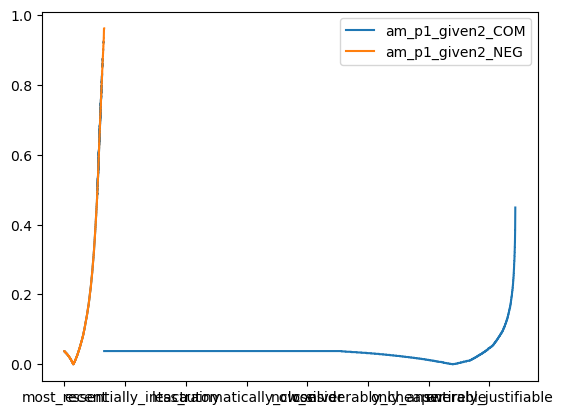

In [103]:
adX_pol.copy().filter(regex=r'given2_[NC]').sort_values('am_p1_given2_NEG').abs().plot()

array([[<Axes: title={'center': 'am_p1_given2_NEG'}>,
        <Axes: title={'center': 'am_p1_given2_COM'}>]], dtype=object)

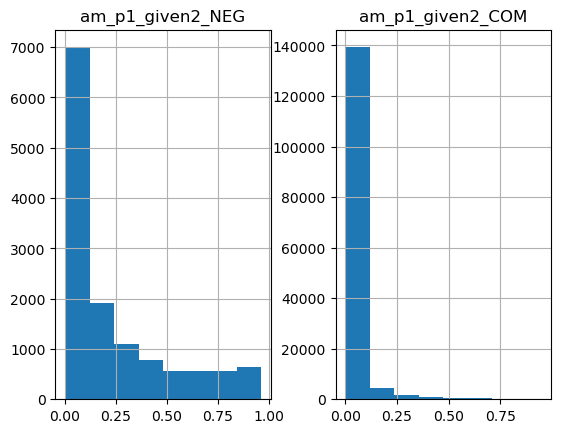

In [104]:
# plot:
adX_pol.copy().filter(regex=r'given2_[NC]').abs().hist(['am_p1_given2_NEG', 'am_p1_given2_COM'], bins=8
                                                       )
         
# fig, ax = plt.subplots()
# ax.hist2d(adX_pol.f_NEG.fillna(0).apply(sqrt), 
#           adX_pol.adv_total.fillna(0).apply(sqrt))

# # ax.set(xlim=(-2, 2), ylim=(-3, 3))

# plt.show()

/home/arh234/anaconda3/envs/dev-sanpi/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


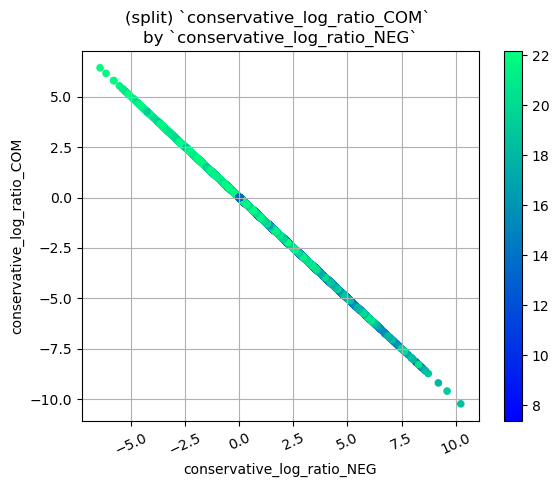

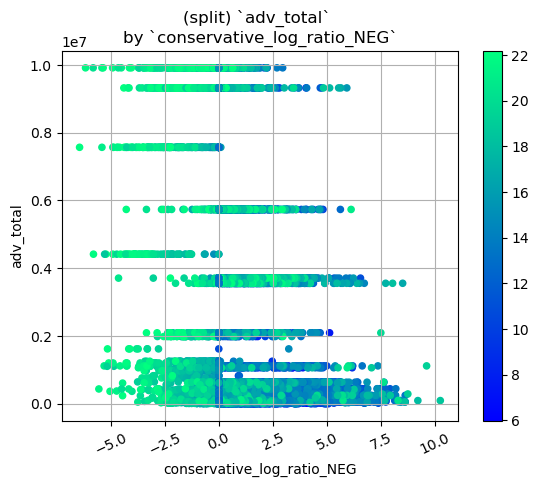

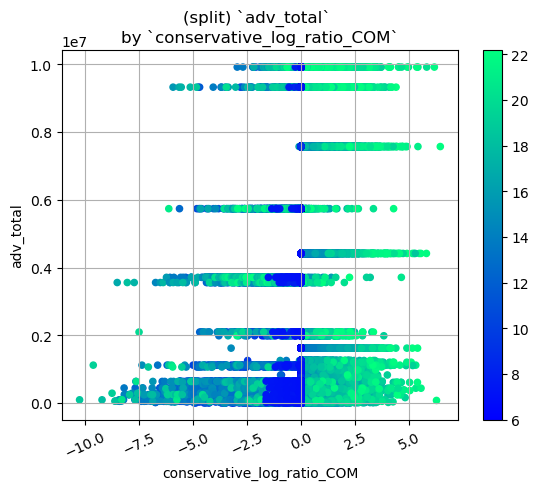

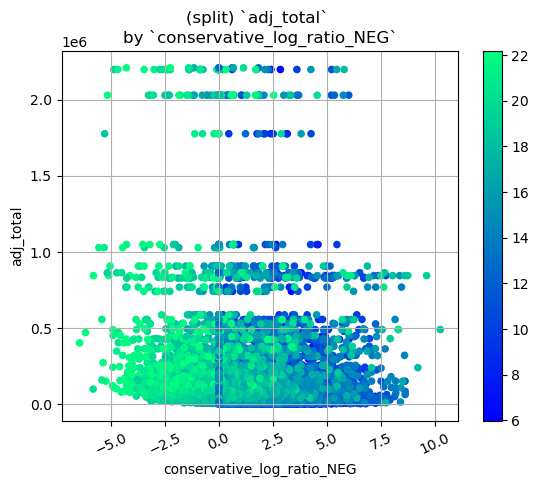

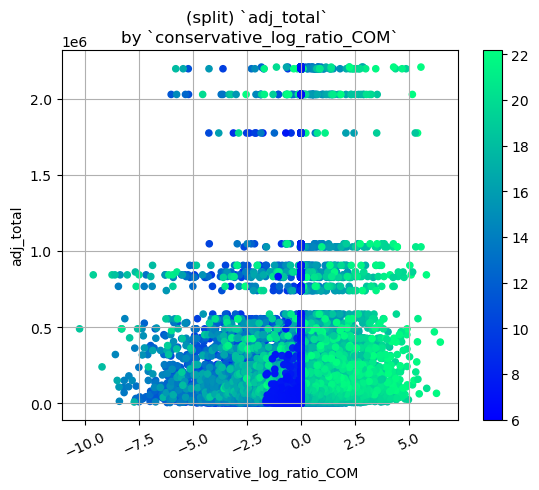

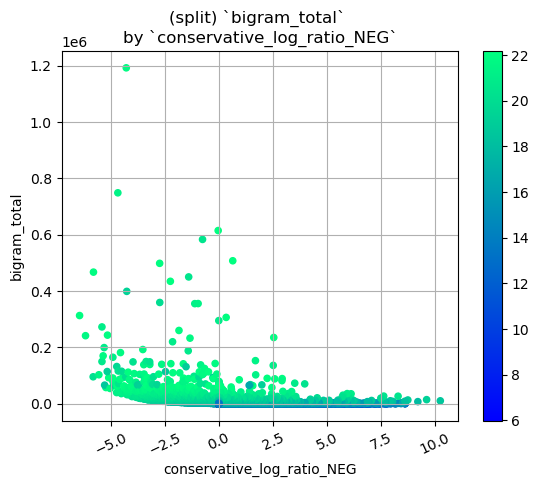

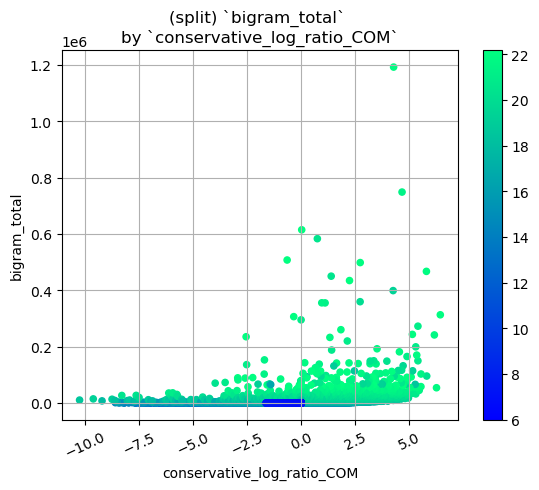

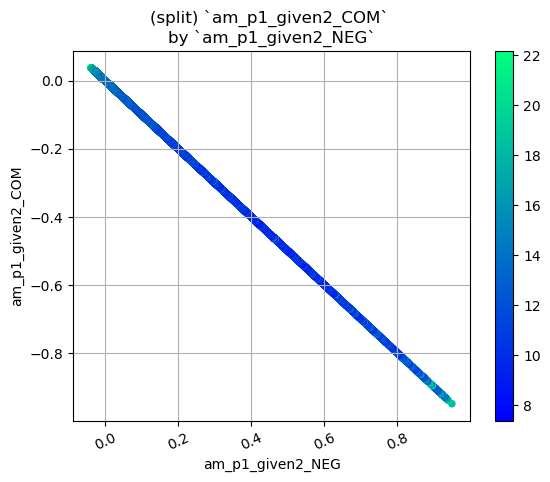

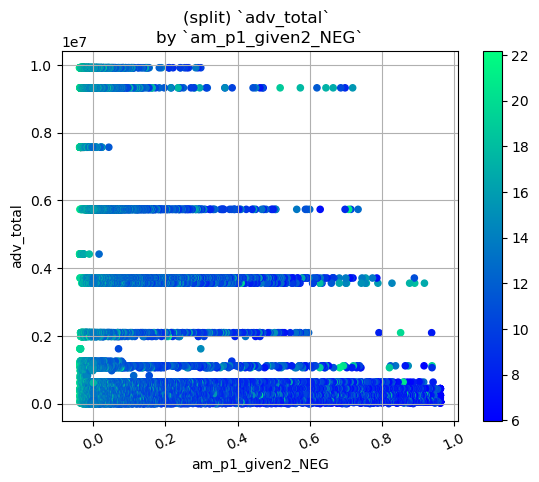

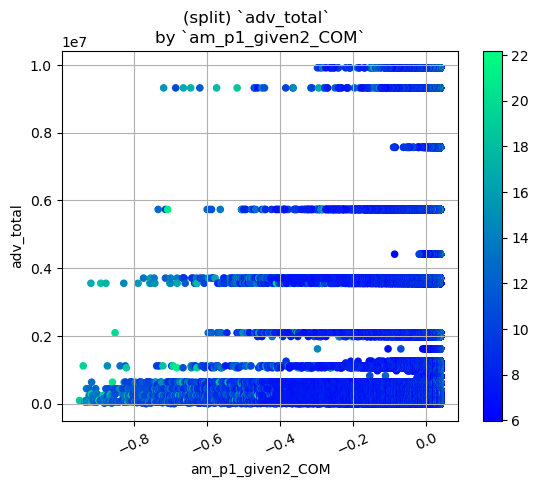

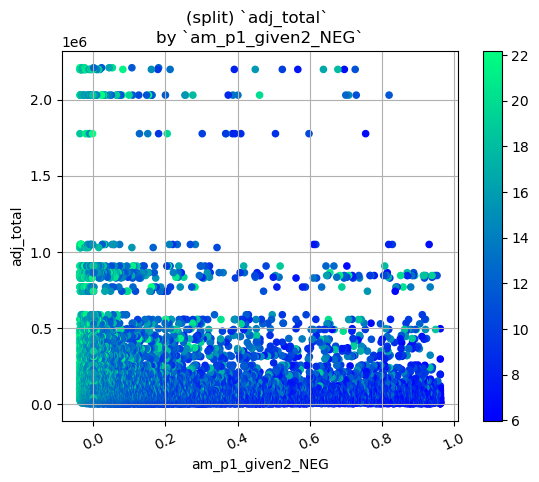

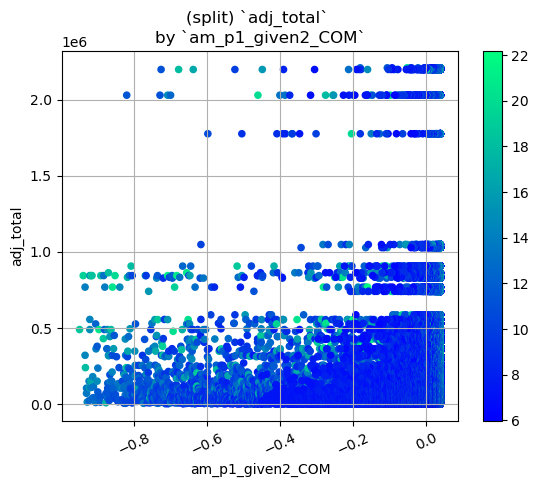

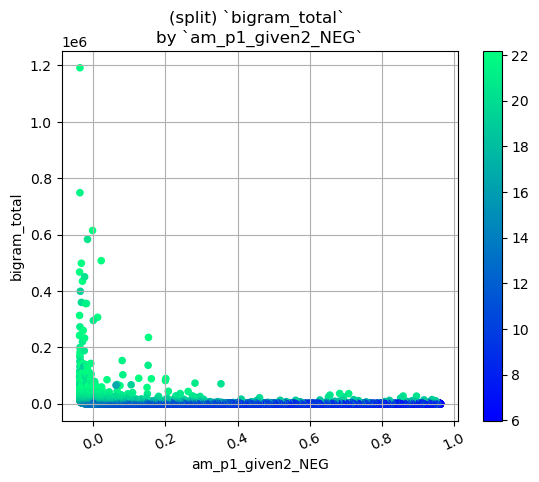

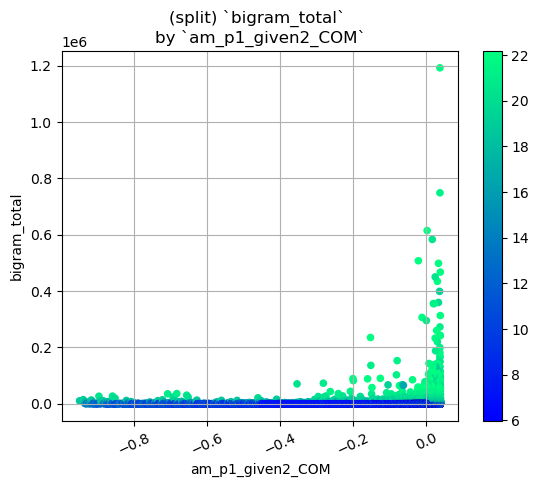

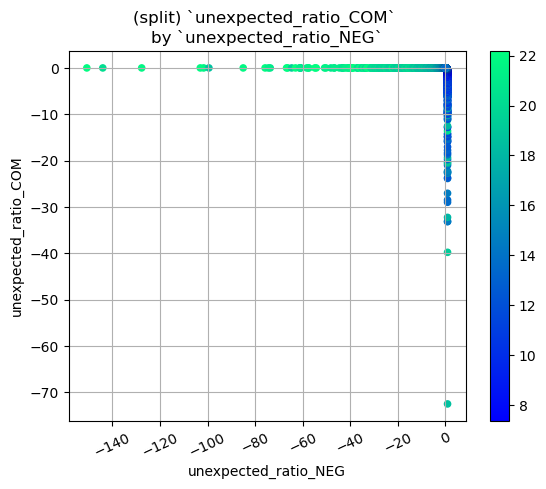

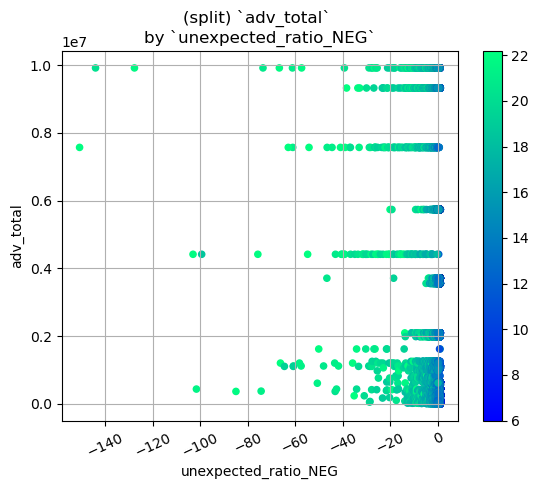

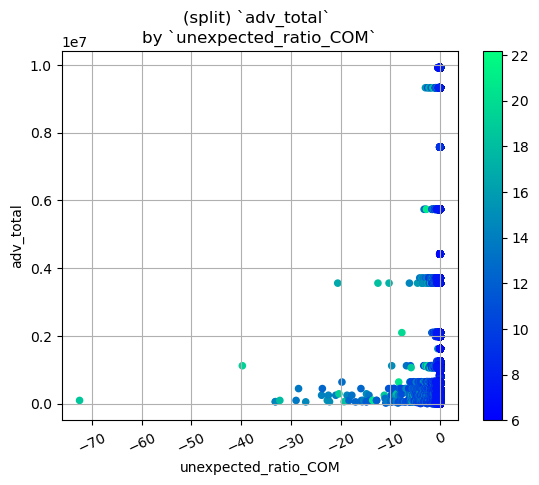

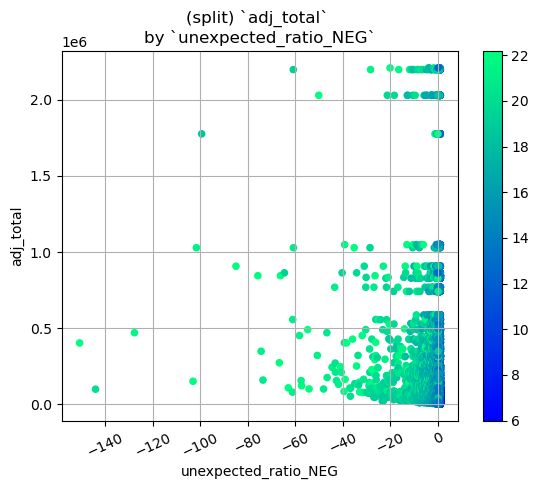

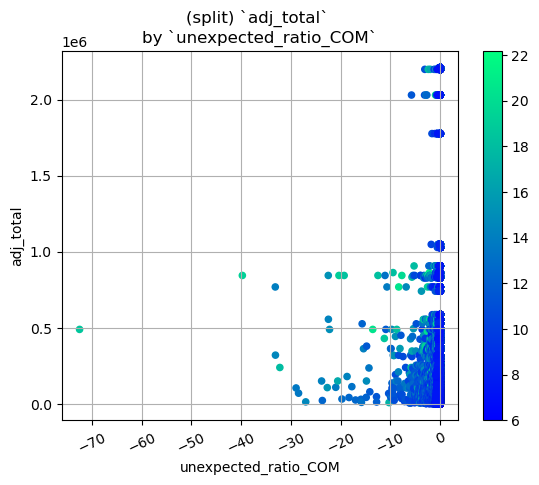

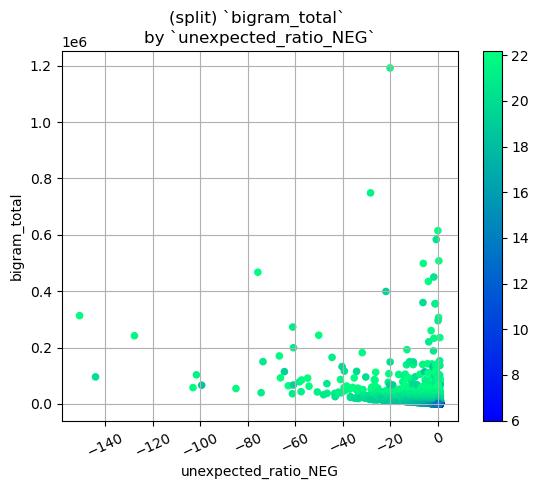

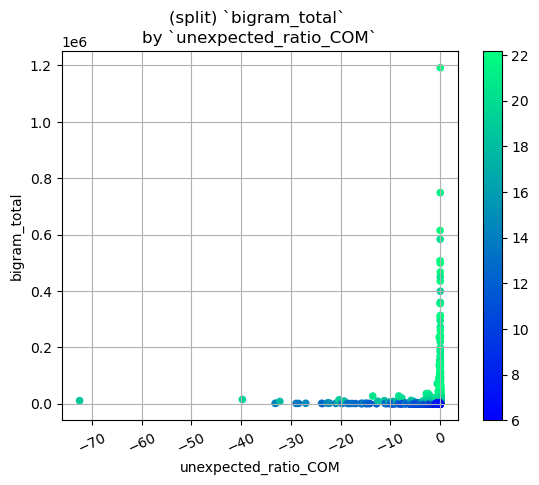

In [105]:
for metric in ['conservative_log_ratio', 'am_p1_given2', 'unexpected_ratio']: 
    illustrate_by_pol(df=adX_pol, x_axes=[f'{metric}_NEG'], y_axes=[f'{metric}_COM'], polarity='(split)')
    illustrate_by_pol(df=adX_pol, x_axes=[f'{metric}_{p}' for p in ('NEG', 'COM')], y_axes=['adv_total', 'adj_total', 'bigram_total'], polarity='(split)')

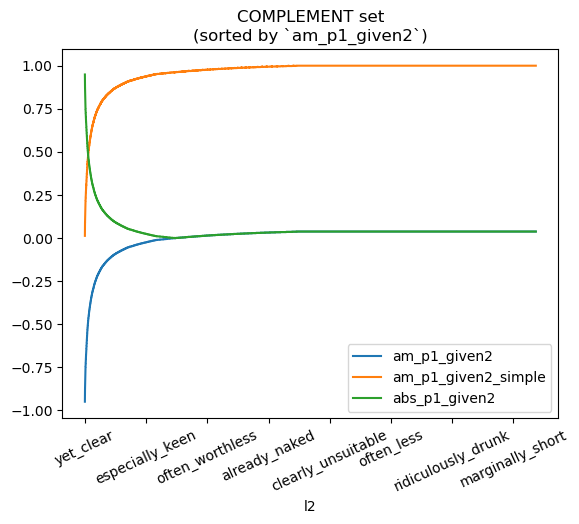

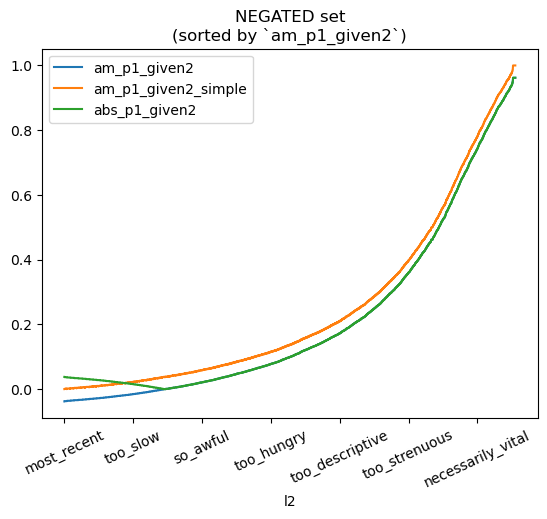

In [106]:
sorter = 'am_p1_given2'
l_OR_p1_given2 = amdf.copy().filter(regex=regex_l12_OR_p1_given2).assign(
    abs_p1_given2=amdf.am_p1_given2.abs())
for polarity, polar_bigrams in (l_OR_p1_given2
                                .sort_values(sorter)
                                .groupby('l1')):

    polar_bigrams.copy().set_index('l2').plot(
        rot=25, title=f'{polarity} set\n(sorted by `{sorter}`)')

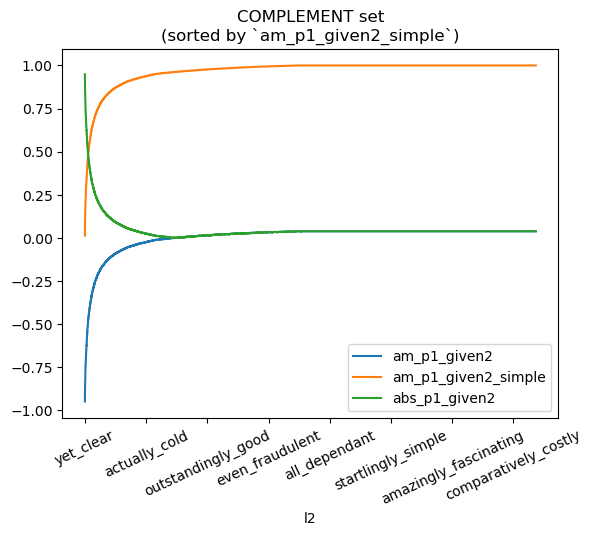

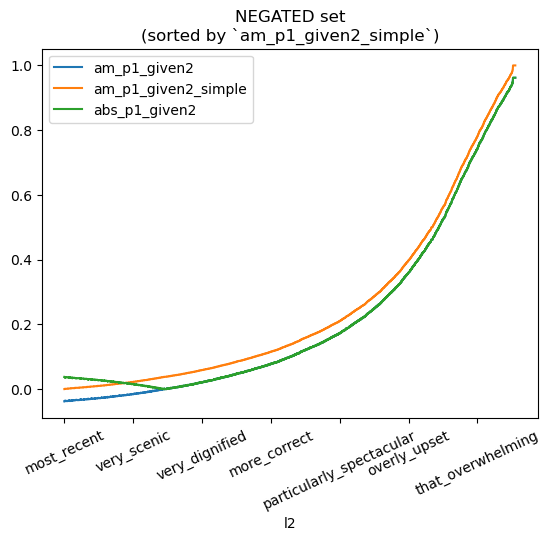

In [107]:
sorter = 'am_p1_given2_simple'
for polarity, polar_bigrams in (l_OR_p1_given2
                                .sort_values(sorter)
                                .groupby('l1')):

    polar_bigrams.copy().set_index('l2').plot(
        rot=25, title=f'{polarity} set\n(sorted by `{sorter}`)')

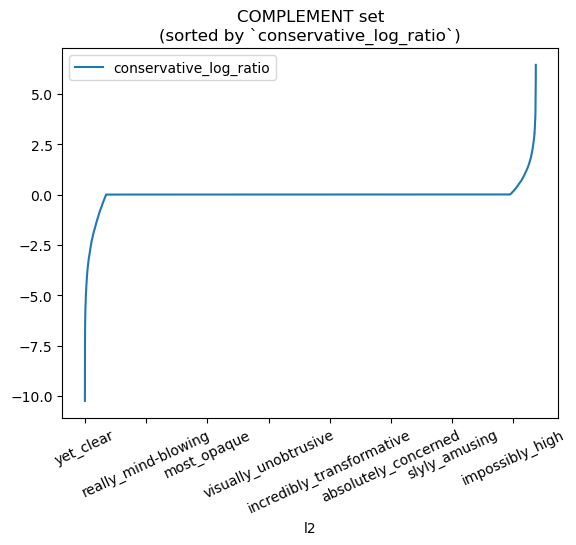

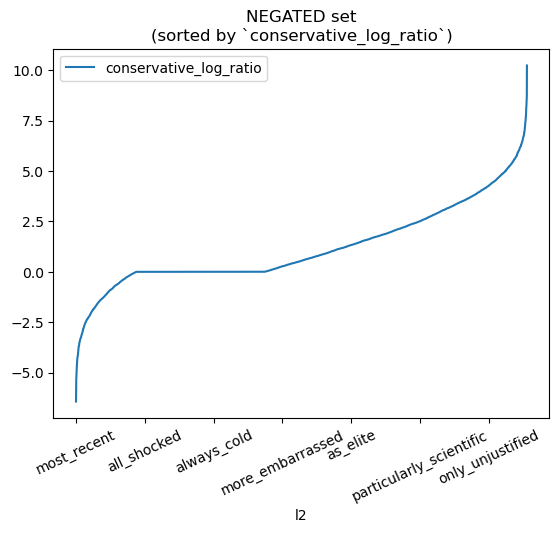

In [108]:

sorter = 'conservative_log_ratio'
for polarity, polar_bigrams in (amdf.filter(regex=regex_l12_OR_conserv)
                                .sort_values(sorter)
                                .groupby('l1')):

    polar_bigrams.copy().set_index('l2').plot(
        rot=25, title=f'{polarity} set\n(sorted by `{sorter}`)')

array([[<Axes: title={'center': 'log_ratio'}>,
        <Axes: title={'center': 'conservative_log_ratio'}>],
       [<Axes: title={'center': 'am_odds_ratio_disc'}>, <Axes: >]],
      dtype=object)

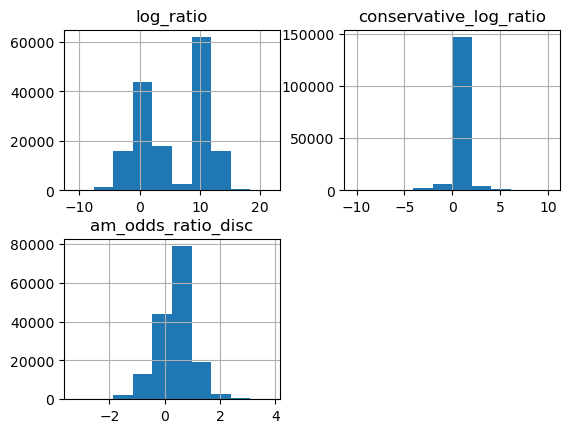

In [109]:
amdf.hist(['log_ratio', 'conservative_log_ratio', 'am_odds_ratio_disc'])

<Axes: >

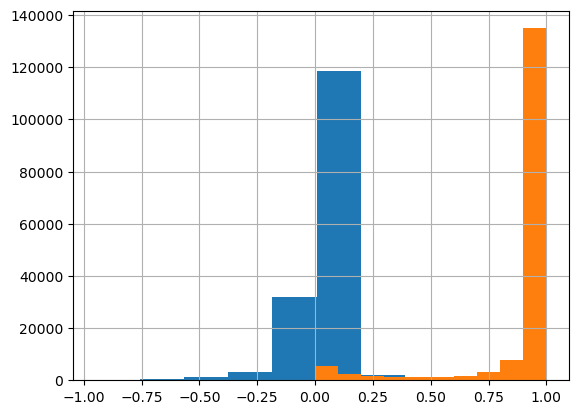

In [110]:
amdf.am_p1_given2.hist()
amdf.am_p1_given2_simple.hist()

array([[<Axes: title={'center': 'acp'}>,
        <Axes: title={'center': 'acp_abs'}>],
       [<Axes: title={'center': 'acp_sq'}>,
        <Axes: title={'center': 'acp_mean_std'}>]], dtype=object)

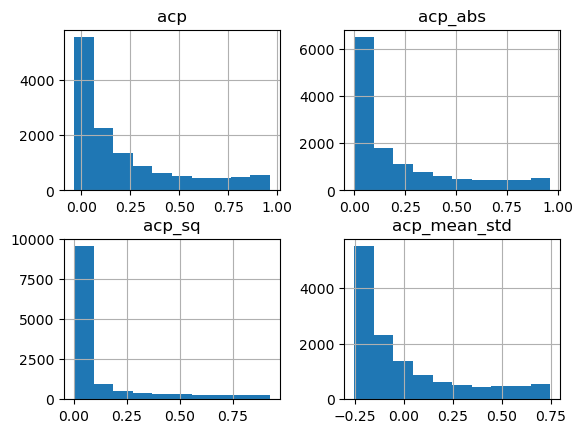

In [111]:
n_acp12 = adX_pol.copy()[['am_p1_given2_NEG']].rename(columns={'am_p1_given2_NEG':'acp'})
n_acp12 = n_acp12.assign(
    acp_abs = n_acp12.acp.abs(), 
    acp_sq = n_acp12.acp ** 2, 
    acp_mean_std = n_acp12.acp - n_acp12.acp.mean()
    )
n_acp12.hist()